# **1) LIMPIADO DE LA PRIMERA BASDE DE DATOS**

##**Primero de todo importamos las librerias que vamos a utilizar y creamos la ruta del directorio para poder ir guardando todos los csv's limpios que generemos**

In [1]:
import pandas as pd
import numpy as np
import os

# Ruta del directorio donde vamos a guardar los archivos
directorio = 'C:/Users/jerez/Desktop/Curso 2023-2024/TFG/Entrega Anteproyecto/Data. CSV/BBDD LIMPIADAS'

# Creamos el directorio
if not os.path.exists(directorio):
    os.makedirs(directorio)

##**Procedemos a cargar y limpiar los datos para generar el csv limpio que utilizaremos finalmente**

In [2]:
#Cargamos el primer csv y verificamos su cabecera para visulaizar los datos
csv_file_path ='/content/BBDD 1.csv'
dfbbdd1 = pd.read_csv(csv_file_path, sep=';')
dfbbdd1.head()

,Total Nacional,Comunidades y Ciudades Autónomas,Provincias,Forma jurídica,Número de sociedades y capital (en miles de euros),Periodo,Total
0,Total Nacional,NaN,NaN,Total,Número de Sociedades,2022,99.116
1,Total Nacional,NaN,NaN,Total,Número de Sociedades,2021,101.210
2,Total Nacional,NaN,NaN,Total,Número de Sociedades,2020,79.200
3,Total Nacional,NaN,NaN,Total,Número de Sociedades,2019,93.951
4,Total Nacional,NaN,NaN,Total,Número de Sociedades,2018,95.121


###***Comenzamos con el limpiado de la base de datos y procedemos a hacer los siguientes cambios:***
1. Eliminamos la columna "Total Nacional"

2. Eliminar Filas en Blanco en "Comunidades y Ciudades Autónomas", las provincias de la columna "Provincias" para dejar solo los totales de las CCAA y posteriormente la columna "Provincias"

3. Eliminar Filas con "Total" en "Forma Jurídica"

4. Eliminar Filas con "capital (en miles de euros) suscrito" en "Número de sociedades y capital (en miles de euros)"

In [3]:
#Paso 1
dfbbdd1.drop('Total Nacional', axis=1, inplace=True)

#Verificamos
dfbbdd1.head()

,Comunidades y Ciudades Autónomas,Provincias,Forma jurídica,Número de sociedades y capital (en miles de euros),Periodo,Total
0,NaN,NaN,Total,Número de Sociedades,2022,99.116
1,NaN,NaN,Total,Número de Sociedades,2021,101.210
2,NaN,NaN,Total,Número de Sociedades,2020,79.200
3,NaN,NaN,Total,Número de Sociedades,2019,93.951
4,NaN,NaN,Total,Número de Sociedades,2018,95.121


In [4]:
#Paso 2
dfbbdd1 = dfbbdd1[dfbbdd1['Comunidades y Ciudades Autónomas'].notna()]

# Filtrar las filas donde la columna "Provincias" es NaN (no contiene ningún valor)
dfbbdd1 = dfbbdd1[pd.isna(dfbbdd1['Provincias'])]

# Eliminar la columna "Provincias" del DataFrame filtrado
dfbbdd1 = dfbbdd1.drop(columns=['Provincias'])

#Verificamos
dfbbdd1.head()

,Comunidades y Ciudades Autónomas,Forma jurídica,Número de sociedades y capital (en miles de euros),Periodo,Total
276,01 Andalucía,Total,Número de Sociedades,2022,17.199
277,01 Andalucía,Total,Número de Sociedades,2021,17.506
278,01 Andalucía,Total,Número de Sociedades,2020,13.654
279,01 Andalucía,Total,Número de Sociedades,2019,15.560
280,01 Andalucía,Total,Número de Sociedades,2018,16.018


In [5]:
#Paso 3
dfbbdd1 = dfbbdd1[dfbbdd1['Forma jurídica'] != 'Total']

#Verificamos
dfbbdd1.head()

,Comunidades y Ciudades Autónomas,Forma jurídica,Número de sociedades y capital (en miles de euros),Periodo,Total
345,01 Andalucía,S.A.,Número de Sociedades,2022,21
346,01 Andalucía,S.A.,Número de Sociedades,2021,38
347,01 Andalucía,S.A.,Número de Sociedades,2020,21
348,01 Andalucía,S.A.,Número de Sociedades,2019,37
349,01 Andalucía,S.A.,Número de Sociedades,2018,29


In [6]:
#Paso 4
dfbbdd1 = dfbbdd1[dfbbdd1['Número de sociedades y capital (en miles de euros)'] != 'capital (en miles de euros) suscrito']

#Verificamos
dfbbdd1.head()

,Comunidades y Ciudades Autónomas,Forma jurídica,Número de sociedades y capital (en miles de euros),Periodo,Total
345,01 Andalucía,S.A.,Número de Sociedades,2022,21
346,01 Andalucía,S.A.,Número de Sociedades,2021,38
347,01 Andalucía,S.A.,Número de Sociedades,2020,21
348,01 Andalucía,S.A.,Número de Sociedades,2019,37
349,01 Andalucía,S.A.,Número de Sociedades,2018,29


###***A continuación una vez tenemos la base de datos limpia, procedemos a añadir una variable que represente la población de cada comunidad y ciudad autónoma en cada periodo, de está manera cuando en un futuro queramos comparar datos podremos hacerlo de forma estandarizada. Esto lo haremos mediante otra dos bases de datos que vamos a unir a continuación***
1. La primera base de datos contiene los datos de poblacion por comunidad autónoma desde el año 2000 al año 2021.

2. La segunda contiene los del año 2022.

3. Nos quedaremos con una única base de datos que contenga 3 columnas. Comunidades y Cuidades Autónomas, Periodo y Población.

In [7]:
#(1ª Base de datos) Cargamos el primer archivo CSV
df1 = pd.read_csv('/content/CCAA 2021-2000.csv', sep=';', encoding='latin-1')

#(2ª Base de datos) Cargamos el segundo archivo CSV
df2 = pd.read_csv('/content/CCAA 2022.csv', sep=';', encoding='latin-1')

# Combinamos los DataFrames
df_combinado = pd.concat([df1, df2], ignore_index=True)

# Verificamos los primeros registros del DataFrame combinado
df_combinado.head()

# Verificar los últimos registros del DataFrame combinado
df_combinado.tail()


,Comunidades y Ciudades Autónomas,Periodo,Total
432,"15 Navarra, Comunidad Foral de",2022,664.514
433,16 País Vasco,2022,2.205.826
434,"17 Rioja, La",2022,319.617
435,18 Ceuta,2022,83.051
436,19 Melilla,2022,84.932


In [8]:
#El nuevo DataFrame queda desordenado y para ello haremos lo siguiente:

# Ordenar el DataFrame primero por 'Comunidades y Ciudades Autónomas' y luego por 'Periodo' en orden descendente
df_combinado = df_combinado.sort_values(by=['Comunidades y Ciudades Autónomas', 'Periodo'], ascending=[True, False])

# Reseteamos el índice del DataFrame después de ordenarlo
df_combinado.reset_index(drop=True, inplace=True)

# Y cambiamos el nombre de la columna 'Total' a 'Población'
df_combinado.rename(columns={'Total': 'Población'}, inplace=True)

# Verificar los cambios
df_combinado.head()


,Comunidades y Ciudades Autónomas,Periodo,Población
0,01 Andalucía,2022,8.511.167
1,01 Andalucía,2021,8.472.407
2,01 Andalucía,2020,8.464.411
3,01 Andalucía,2019,8.414.240
4,01 Andalucía,2018,8.384.408


###***Una vez tenemos este DataFrame con la población española desde el año 2000 al año 2022, podemos añadirla a nuestro Dataframe principal.***

Queremos tener el dato de la población que hay en cada Comunidad o Ciudad Autónoma segun el periodo para poder comparar de forma estandar la cantidad de sociedades o el capital desembolsado que hay en base a la población.

In [9]:
#Convertir a tipos de datos consistentes por si hubiera algún error
dfbbdd1['Periodo'] = dfbbdd1['Periodo'].astype(str)
df_combinado['Periodo'] = df_combinado['Periodo'].astype(str)

#Utilizando la función merge combinamos dfbbdd1 y df_combinado basándome en las columnas "Comunidades y Ciudades Autónomas" y "Periodo".
dfbbdd1 = pd.merge(dfbbdd1, df_combinado, on=['Comunidades y Ciudades Autónomas', 'Periodo'], how='left')

#Verificamos
dfbbdd1.head()

,Comunidades y Ciudades Autónomas,Forma jurídica,Número de sociedades y capital (en miles de euros),Periodo,Total,Población
0,01 Andalucía,S.A.,Número de Sociedades,2022,21,8.511.167
1,01 Andalucía,S.A.,Número de Sociedades,2021,38,8.472.407
2,01 Andalucía,S.A.,Número de Sociedades,2020,21,8.464.411
3,01 Andalucía,S.A.,Número de Sociedades,2019,37,8.414.240
4,01 Andalucía,S.A.,Número de Sociedades,2018,29,8.384.408


In [10]:
# Cambiamos el nombre de la columna 'Total' a 'Número Sociedades/Capital'
dfbbdd1.rename(columns={'Total': 'Número Sociedades/Capital'}, inplace=True)

# Cambiamos el nombre de la columna 'Periodo' a 'Año'
dfbbdd1.rename(columns={'Periodo': 'Año'}, inplace=True)

# Cambiamos el nombre de la columna 'Comunidades y Ciudades Autónomas' a 'Comunidad Autónoma'
dfbbdd1.rename(columns={'Comunidades y Ciudades Autónomas': 'Comunidad Autónoma'}, inplace=True)

# Cambiamos el nombre de la columna 'Número de sociedades y capital (en miles de euros)' a 'Sociedades o Capital desembolsado'
dfbbdd1.rename(columns={'Número de sociedades y capital (en miles de euros)': 'Sociedades o Capital desembolsado'}, inplace=True)

dfbbdd1['Número Sociedades/Capital'] = pd.to_numeric(dfbbdd1['Número Sociedades/Capital'].str.replace(',', ''), errors='coerce')


#Verificamos
dfbbdd1.head()

,Comunidad Autónoma,Forma jurídica,Sociedades o Capital desembolsado,Año,Número Sociedades/Capital,Población
0,01 Andalucía,S.A.,Número de Sociedades,2022,21.0,8.511.167
1,01 Andalucía,S.A.,Número de Sociedades,2021,38.0,8.472.407
2,01 Andalucía,S.A.,Número de Sociedades,2020,21.0,8.464.411
3,01 Andalucía,S.A.,Número de Sociedades,2019,37.0,8.414.240
4,01 Andalucía,S.A.,Número de Sociedades,2018,29.0,8.384.408


##**Por último una vez tenemos la base de datos limpia y con variables nuevas que nos ayudaran a tomar decisiones con datos estandarizados, guardamos el archivo csv y lo descargamos**

In [11]:
# Ruta completa del archivo CSV
ruta_completa = os.path.join(directorio, 'dfbbdd1.csv')

# Guardar el DataFrame en la ruta especificada
dfbbdd1.to_csv(ruta_completa, index=True)


# **2) LIMPIADO DE LA SEGUNDA BASE DE DATOS**

##**Procedemos a cargar y limpiar los datos para generar el csv limpio que utilizaremos finalmente**

In [12]:
import pandas as pd

# Cargar el archivo CSV
dfbbdd2 = pd.read_csv('/content/BBDD 2.csv', sep=';', encoding='utf-8')

#Verificamos
dfbbdd2.head()

,Estados Sociedades,Actividad económica,Periodo,Total
0,Disueltas,"A Agricultura, ganadería, silvicultura y pesca",2023M09,"1,85"
1,Disueltas,"A Agricultura, ganadería, silvicultura y pesca",2023M08,"1,18"
2,Disueltas,"A Agricultura, ganadería, silvicultura y pesca",2023M07,"1,16"
3,Disueltas,"A Agricultura, ganadería, silvicultura y pesca",2023M06,"1,69"
4,Disueltas,"A Agricultura, ganadería, silvicultura y pesca",2023M05,"1,06"


###***Comenzamos con el limpiado de la base de datos y procedemos a hacer los siguientes cambios:***

1. Cambiar el valor "Sociedades Constituidas" por "Constituidas" en la columna "Estados Sociedades".

2. Cambiar los nombres de algunos valores en la columna "Actividad Económica".

3. Agrupar los periodos por año y eliminar los datos correspondientes al año 2023.

4. Cambiamos el nombre de las columnas "Periodo" y "Total".

In [13]:
#Paso 1
dfbbdd2['Estados Sociedades'] = dfbbdd2['Estados Sociedades'].replace('Sociedades Constituídas', 'Constituidas')
# Nos aseguramos que los valores de la variable "Total" sean números y no cadenas.
dfbbdd2['Total'] = dfbbdd2['Total'].str.replace(',', '.').astype(float)

#Verificamos
dfbbdd2.tail()

,Estados Sociedades,Actividad económica,Periodo,Total
3097,Constituidas,Resto de servicios,2012M05,6.98
3098,Constituidas,Resto de servicios,2012M04,7.66
3099,Constituidas,Resto de servicios,2012M03,7.55
3100,Constituidas,Resto de servicios,2012M02,7.50
3101,Constituidas,Resto de servicios,2012M01,7.83


In [14]:
#Paso 2
#Cambiamos nombres de valores en "Actividad Económica" resumiendo algunos nombres y quitando las primeras inciales de otros:
dfbbdd2['Actividad económica'] = dfbbdd2['Actividad económica'].replace('A Agricultura, ganadería, silvicultura y pesca', 'Actividades Primarias')

dfbbdd2['Actividad económica'] = dfbbdd2['Actividad económica'].replace('F Construcción', 'Construcción')

dfbbdd2['Actividad económica'] = dfbbdd2['Actividad económica'].replace('G Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas', 'Comercio al por mayor y menor, reparación de vehículos')

dfbbdd2['Actividad económica'] = dfbbdd2['Actividad económica'].replace('H Transporte y almacenamiento', 'Transporte y almacenamiento')

dfbbdd2['Actividad económica'] = dfbbdd2['Actividad económica'].replace('I Hostelería', 'Hostelería')

dfbbdd2['Actividad económica'] = dfbbdd2['Actividad económica'].replace('J Información y comunicaciones', 'Información y comunicaciones')

dfbbdd2['Actividad económica'] = dfbbdd2['Actividad económica'].replace('M Actividades profesionales, científicas y técnicas', 'Actividades profesionales, científicas y técnicas')

dfbbdd2['Actividad económica'] = dfbbdd2['Actividad económica'].replace('N Actividades administrativas y servicios auxiliares', 'Actividades administrativas y servicios auxiliares')


In [15]:
#Paso 3
# Agrupar y Sumar por Año en "Periodo"

# Convertir la columna 'Periodo' a string
dfbbdd2['Periodo'] = dfbbdd2['Periodo'].astype(str)

# Extraer el año de la columna 'Periodo'
dfbbdd2['Periodo'] = dfbbdd2['Periodo'].str[:4].astype(int)

# Eliminar los datos del año 2023
dfbbdd2 = dfbbdd2[dfbbdd2['Periodo'] != 2023]

# Agrupar por 'Estados Sociedades', 'Actividad Económica' y 'Periodo', y sumar los totales
dfbbdd2 = dfbbdd2.groupby(['Estados Sociedades', 'Actividad económica', 'Periodo']).sum().reset_index()

# Ordenar el DataFrame primero por 'Actividad económica' y luego por 'Periodo' en orden descendente
dfbbdd2 = dfbbdd2.sort_values(by=['Estados Sociedades', 'Actividad económica', 'Periodo'], ascending=[True, True, False])

# Reseteamos el índice del DataFrame después de ordenarlo
dfbbdd2.reset_index(drop=True, inplace=True)


#Verificamos
dfbbdd2.head()

,Estados Sociedades,Actividad económica,Periodo,Total
0,Constituidas,Actividades Primarias,2022,30.22
1,Constituidas,Actividades Primarias,2021,35.34
2,Constituidas,Actividades Primarias,2020,37.55
3,Constituidas,Actividades Primarias,2019,31.40
4,Constituidas,Actividades Primarias,2018,36.98


In [16]:
#Paso 4
# Cambiamos el nombre de la columna 'Periodo' a 'Año'
dfbbdd2.rename(columns={'Periodo': 'Año'}, inplace=True)

# Cambiamos el nombre de la columna 'Total' a 'Número Sociedades'
dfbbdd2.rename(columns={'Total': 'Número Sociedades'}, inplace=True)

#verificamos
dfbbdd2.head()

,Estados Sociedades,Actividad económica,Año,Número Sociedades
0,Constituidas,Actividades Primarias,2022,30.22
1,Constituidas,Actividades Primarias,2021,35.34
2,Constituidas,Actividades Primarias,2020,37.55
3,Constituidas,Actividades Primarias,2019,31.40
4,Constituidas,Actividades Primarias,2018,36.98


##**Por último una vez tenemos la base de datos limpia, guardamos el archivo csv y lo descargamos**

In [17]:
import os

# Ruta del directorio donde quieres guardar el archivo
directorio = 'C:/Users/jerez/Desktop/Curso 2023-2024/TFG/Entrega Anteproyecto/Data. CSV/BBDD LIMPIADAS'

# Ruta completa del archivo CSV
ruta_completa = os.path.join(directorio, 'dfbbdd2.csv')

# Guardar el DataFrame en la ruta especificada
dfbbdd2.to_csv(ruta_completa, index=True)


# **3) LIMPIADO DE LA CUARTA BASE DE DATOS**

## **Cargamos los archivos y creamos los dos dataframes y procedemos a unirlos por la columna común con el fin de asignar la comunidad autónoma correspondiente a las provincias.**

---



In [18]:
import pandas as pd

# Cargar el primer archivo 'BBDD 4'
dfbbdd3 = pd.read_csv('/content/BBDD 4.csv', sep=';', encoding='latin-1')

# Cambiamos el nombre de la columna 'Provincias' a 'Provincia' para que sea el mismo que en el otro dataframe
dfbbdd3.rename(columns={'Provincias': 'Provincia'}, inplace=True)

#Verificamos
dfbbdd3.head()

,Provincia,Clase de disolución,Periodo,Total
0,02 Albacete,Voluntaria,2022M12,0
1,02 Albacete,Voluntaria,2022M11,1
2,02 Albacete,Voluntaria,2022M10,1
3,02 Albacete,Voluntaria,2022M09,0
4,02 Albacete,Voluntaria,2022M08,1


In [19]:
# Cargamos el segundo archivo 'CCAA y Provincias correspond'
df_ad = pd.read_csv('/content/CCAA y Provincias correspond.csv', sep=';', encoding='utf-8')

#Verificamos
df_ad.head()

,Comunidad Autónoma,Provincia
0,01 Andalucía,04 Almería
1,01 Andalucía,11 Cádiz
2,01 Andalucía,14 Córdoba
3,01 Andalucía,18 Granada
4,01 Andalucía,21 Huelva


In [20]:
# Combinamos dfbbdd4 con df_ad en la columna común (en este caso, 'Provincia')
dfbbdd3 = pd.merge(dfbbdd3, df_ad, on='Provincia', how='left')

#Verificamos
dfbbdd3.head()

,Provincia,Clase de disolución,Periodo,Total,Comunidad Autónoma
0,02 Albacete,Voluntaria,2022M12,0,08 Castilla-La Mancha
1,02 Albacete,Voluntaria,2022M11,1,08 Castilla-La Mancha
2,02 Albacete,Voluntaria,2022M10,1,08 Castilla-La Mancha
3,02 Albacete,Voluntaria,2022M09,0,08 Castilla-La Mancha
4,02 Albacete,Voluntaria,2022M08,1,08 Castilla-La Mancha


### ***Comenzamos con el limpiado de la base de datos y procedemos a hacer los siguientes cambios:***

1. Agruparemos los periodos mensuales del dataframe por años y los ordenaremos de manera descendente.

In [21]:
#Agrupamos segun 'Clase de disolución', 'Periodo', 'Comunidad Autónoma' y sumamos los totales
dfbbdd3['Periodo'] = dfbbdd3['Periodo'].str[:4].astype(int)
dfbbdd3 = dfbbdd3.groupby(['Clase de disolución', 'Periodo', 'Comunidad Autónoma']).sum().reset_index()

# Ordenamos el DataFrame primero por 'Clase de disolución', luego por 'Periodo' en orden descendente
dfbbdd3 = dfbbdd3.sort_values(by=['Periodo','Clase de disolución', 'Comunidad Autónoma', ], ascending=[False, True, True])

# Reseteamos el índice del DataFrame después de ordenarlo
dfbbdd3.reset_index(drop=True, inplace=True)

# Cambiamos el nombre de la columna 'Periodo' a 'Año'
dfbbdd3.rename(columns={'Periodo': 'Año'}, inplace=True)

# Cambiamos el nombre de la columna 'Total' a 'Número Sociedades'
dfbbdd3.rename(columns={'Total': 'Número Sociedades'}, inplace=True)

#Verificamos
dfbbdd3.head()

,Clase de disolución,Año,Comunidad Autónoma,Provincia,Número Sociedades
0,Otras,2022,01 Andalucía,04 Almería04 Almería04 Almería04 Almería04 Alm...,356
1,Otras,2022,02 Aragón,22 Huesca22 Huesca22 Huesca22 Huesca22 Huesca2...,53
2,Otras,2022,"03 Asturias, Principado de",33 Asturias33 Asturias33 Asturias33 Asturias33...,60
3,Otras,2022,"04 Balears, Illes","07 Balears, Illes07 Balears, Illes07 Balears, ...",61
4,Otras,2022,05 Canarias,"35 Palmas, Las35 Palmas, Las35 Palmas, Las35 P...",88


## **Por último guardamos el csv con los cambios realizados en nuestro directorio:**


In [22]:
import os

# Ruta del directorio donde quieres guardar el archivo
directorio = 'C:/Users/jerez/Desktop/Curso 2023-2024/TFG/Entrega Anteproyecto/Data. CSV/BBDD LIMPIADAS'

# Ruta completa del archivo CSV
ruta_completa = os.path.join(directorio, 'dfbbdd3.csv')

# Guardar el DataFrame en la ruta especificada
dfbbdd3.to_csv(ruta_completa, index=True)

# **4) LIMPIADO DE LA QUINTA BASE DE DATOS**

Según el INE, el **Índice de Confianza Empresarial Armonizado (ICEA)** es un indicador que mide el estado de ánimo de los empresarios españoles sobre la marcha actual y futura de su negocio. Se elabora con carácter trimestral desde 2012 con el objetivo de conocer, en un momento determinado, la visión que tienen los responsables de los establecimientos sobre la situación y expectativas de su negocio.

El ICEA se calcula a partir de dos componentes:

**Situación**: *Es la diferencia o saldo entre el porcentaje de respuestas favorables y desfavorables relativas al trimestre que acaba.* La Situación puede oscilar entre -100 y +100.

**Expectativas**: *Es la diferencia entre el porcentaje de respuestas favorables y desfavorables sobre la situación que se espera para el trimestre siguiente.* Las Expectativas pueden oscilar entre -100 y +100.

El ICEA se calcula como una media geométrica convenientemente normalizada entre la Situación y las Expectativas. Por lo tanto, el ICEA puede tomar valores entre -50 y +50.

**Un ICEA positivo indica que los empresarios son optimistas sobre la marcha de su negocio, mientras que un ICEA negativo indica que son pesimistas.**

El ICEA es un indicador importante para la economía española, ya que refleja la opinión de los empresarios, que son los principales agentes económicos del país. Un ICEA elevado indica que los empresarios están optimistas sobre la economía, lo que puede conducir a un aumento de la inversión, el empleo y el crecimiento económico. Por el contrario, un ICEA bajo indica que los empresarios son pesimistas sobre la economía, lo que puede conducir a una disminución de la inversión, el empleo y el crecimiento económico.

**Fuentes**

www.docsity.com/es/apuntes-economia-upv-ehu-periodismo/5308250/

www.ine.es/dyngs/INEbase/es/operacion.htm?c=Estadistica_C&cid=1254736163552&menu=ultiDatos&idp=1254735576550#:~:text=%C3%9Altima%20Nota%20de%20prensa&text=La%20Confianza%20Empresarial%20sube%20un,la%20marcha%20de%20su%20negocio.

www.ine.es/jaxiT3/Tabla.htm?t=8028&L=0#:~:text=1)%20Situaci%C3%B3n%3A%20Indicador%20de%20situaci%C3%B3n,Opiniones%20respecto%20al%20trimestre%20anterior.

##**Primero, como siempre cargamos el archivo csv y lo asignamos a un dataframe**

In [23]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
dfbbdd4 = pd.read_csv('/content/BBDD 5.csv', sep=';', encoding='UTF-8')

#Verificamos
dfbbdd4.head()


,Total Nacional,Comunidades y Ciudades Autónomas,Principales indicadores,Periodo,Total
0,Total Nacional,NaN,Indice de confianza empresarial armonizado,2023T4,"133,2"
1,Total Nacional,NaN,Indice de confianza empresarial armonizado,2023T3,"135,9"
2,Total Nacional,NaN,Indice de confianza empresarial armonizado,2023T2,"132,5"
3,Total Nacional,NaN,Indice de confianza empresarial armonizado,2023T1,"129,0"
4,Total Nacional,NaN,Indice de confianza empresarial armonizado,2022T4,"127,2"


## ***Después, procedemos a limpiar la base de datos realizando los siguientes cambios:***
1. Eliminamos la columna 'Total Nacional'.

2. Cambiaremos el nombre de la variable 'Comunidades y Ciudades Autónomas' y eliminaremos las filas que no tengan valores asignados a esta variable.

3. Quitaremos dos de los tres valores que puede tomar la variable 'Principales indicadores' para quedarnos con el que nos interesa, en este caso el "Indice de confianza empresarial armonizado", que cambiaremos de nombre por su abreviatura "ICEA". Además Cambiaremos el nombre de la variable a 'Indicador'

4. Pasaremos la variable 'Periodo' que está representada en cuatrimestres por año a años completos.

In [24]:
#Paso 1
# Eliminar la columna 'Total nacional'
dfbbdd4.drop('Total Nacional', axis=1, inplace=True)

#Verificamos
dfbbdd4.head()

,Comunidades y Ciudades Autónomas,Principales indicadores,Periodo,Total
0,NaN,Indice de confianza empresarial armonizado,2023T4,"133,2"
1,NaN,Indice de confianza empresarial armonizado,2023T3,"135,9"
2,NaN,Indice de confianza empresarial armonizado,2023T2,"132,5"
3,NaN,Indice de confianza empresarial armonizado,2023T1,"129,0"
4,NaN,Indice de confianza empresarial armonizado,2022T4,"127,2"


In [25]:
#Paso 2

# Cambiamos el nombre de la columna 'Comunidades y Ciudades Autónomas'
dfbbdd4.rename(columns={'Comunidades y Ciudades Autónomas': 'Comunidad Autónoma'}, inplace=True)

# Contamos filas vacías en 'Comunidad Autónoma'
filas_vacias = dfbbdd4['Comunidad Autónoma'].isna().sum()
print("Número de filas vacías en 'Comunidad Autónoma':", filas_vacias)

# Eliminamos filas donde 'Comunidad Autónoma' es NaN
dfbbdd4.dropna(subset=['Comunidad Autónoma'], inplace=True)

#Verificamos
dfbbdd4.head()

Número de filas vacías en 'Comunidad Autónoma': 132


,Comunidad Autónoma,Principales indicadores,Periodo,Total
132,01 Andalucía,Indice de confianza empresarial armonizado,2023T4,"133,1"
133,01 Andalucía,Indice de confianza empresarial armonizado,2023T3,"137,4"
134,01 Andalucía,Indice de confianza empresarial armonizado,2023T2,"133,6"
135,01 Andalucía,Indice de confianza empresarial armonizado,2023T1,"129,1"
136,01 Andalucía,Indice de confianza empresarial armonizado,2022T4,"126,7"


In [26]:
#Paso 3

#Filtramos solo las filas con "Indice de confianza empresarial armonizado"
dfbbdd4 = dfbbdd4[dfbbdd4['Principales indicadores'] == 'Indice de confianza empresarial armonizado']

# Cambiar el nombre de los valores a 'ICEA'
dfbbdd4['Principales indicadores'] = 'ICEA'

# Cambiamos el nombre de la columna 'Principales indicadores'
dfbbdd4.rename(columns={'Principales indicadores': 'Indicador'}, inplace=True)

#Verificamos
dfbbdd4.head()

<ipython-input-26-de8c86800d74>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbbdd4['Principales indicadores'] = 'ICEA'
<ipython-input-26-de8c86800d74>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbbdd4.rename(columns={'Principales indicadores': 'Indicador'}, inplace=True)


,Comunidad Autónoma,Indicador,Periodo,Total
132,01 Andalucía,ICEA,2023T4,"133,1"
133,01 Andalucía,ICEA,2023T3,"137,4"
134,01 Andalucía,ICEA,2023T2,"133,6"
135,01 Andalucía,ICEA,2023T1,"129,1"
136,01 Andalucía,ICEA,2022T4,"126,7"


In [27]:
#Paso 4

# Cambiamos el nombre de la columna 'Periodo'
dfbbdd4.rename(columns={'Periodo': 'Año'}, inplace=True)

# Extraer el año de la columna 'Periodo'
dfbbdd4['Año'] = dfbbdd4['Año'].str[:4].astype(int)

# Eliminar los datos del año 2023
dfbbdd4 = dfbbdd4[dfbbdd4['Año'] <= 2022]

# Agrupar por 'Comunidad Autónoma', 'Indicador' y 'Periodo', y calcular la media de 'Total'
dfbbdd4 = dfbbdd4.groupby(['Comunidad Autónoma', 'Indicador', 'Año', 'Total']).mean().reset_index()

#Verificamos
dfbbdd4.head()

<ipython-input-27-dce850d79a44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbbdd4.rename(columns={'Periodo': 'Año'}, inplace=True)
<ipython-input-27-dce850d79a44>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbbdd4['Año'] = dfbbdd4['Año'].str[:4].astype(int)


,Comunidad Autónoma,Indicador,Año,Total
0,01 Andalucía,ICEA,2013,"100,0"
1,01 Andalucía,ICEA,2013,"105,2"
2,01 Andalucía,ICEA,2013,"112,8"
3,01 Andalucía,ICEA,2013,"115,7"
4,01 Andalucía,ICEA,2014,"116,7"


## **Por último hacemos los úlitmos retoques y guardamos el csv con los cambios realizados en nuestro directorio:**


In [28]:
# Cambiamos el nombre de la columna 'Total'
dfbbdd4.rename(columns={'Total': 'Valor Indicador'}, inplace=True)

# Nos aseguramos que los valores de la variable "Valor Indicador" sean números y no cadenas.
dfbbdd4['Valor Indicador'] = dfbbdd4['Valor Indicador'].str.replace(',', '.').astype(float)

# Agrupamos por 'Indicador', 'Comunidad Autónoma' y 'Año', y calculamos la media de 'Valor Indicador'
dfbbdd4 = dfbbdd4.groupby(['Indicador', 'Comunidad Autónoma', 'Año']).mean().reset_index()

#Redondeamos los números para que salgan enteros
dfbbdd4["Valor Indicador"] = dfbbdd4["Valor Indicador"].round(0)

# Convertir la columna 'Valor Indicador' a enteros
dfbbdd4['Valor Indicador'] = dfbbdd4['Valor Indicador'].astype(int)

import os

# Ruta del directorio donde guardar el archivo
directorio = 'C:/Users/jerez/Desktop/Curso 2023-2024/TFG/Entrega Anteproyecto/Data. CSV/BBDD LIMPIADAS'

# Ruta completa del archivo CSV
ruta_completa = os.path.join(directorio, 'dfbbdd4.csv')

# Guardar el DataFrame en la ruta especificada
dfbbdd4.to_csv(ruta_completa, index=True)

#Verificamos
dfbbdd4.head()

,Indicador,Comunidad Autónoma,Año,Valor Indicador
0,ICEA,01 Andalucía,2013,108
1,ICEA,01 Andalucía,2014,121
2,ICEA,01 Andalucía,2015,130
3,ICEA,01 Andalucía,2016,131
4,ICEA,01 Andalucía,2017,134


#**5) LIMPIADO DE LA SEXTA Y SEPTIMA BASE DE DATOS**

Los **dos archivos** que se van a tratar **difieren significativamente de los datos estructurados** previamente procesados.


En el caso de los datos estructurados, se presentaban en un formato tabular, con una organización predefinida en filas y columnas, lo que facilitaba la aplicación de transformaciones y análisis mediante bibliotecas como Pandas en Python. Sin embargo, **los datos semiestructurados contenidos en archivos Excel presentan una estructura menos uniforme y pueden estar dispersos en varias hojas de trabajo o celdas.**


Esto implicará que la **limpieza y organización de estos datos** requiera un **enfoque más manual**, haciendo uso de las capacidades de Excel, como fórmulas, filtros y funciones.

Estos dos archivos excel contiene información de respecto a los ERTE's de 2021 y 2022. La información está dividida entre distintas pestañas y distintas tablas. A cotinuación, se mostrará mediante capturas de pantalla, como se ha llegado hasta el csv con los datos de estos archivos.

##**PRIMER ARCHIVO EXCEL (HASTA OCTUBRE DE 2021)**

Esta siguiente imagén muestran las páginas en las que se divide el primer archivo excel, ocho en total. Además indica la fecha hasta la que se han recogido los datos, en este caso hasta octubre de 2021.

**Se han utilizado datos** de las páginas **"0. Afiliados en ERTEs vinculados al COVID-19 según tipo suspensión y tipo de ERTE"**, la página **"5. Afiliados en ERTEs vinculados al COVID-19 por sexo y actividad económica (CNAE). Tipo suspensión"** y la página **"7. Afiliados en ERTEs vinculados al COVID-19 por sexo, provincia y CCAA. Tipo suspensión"**

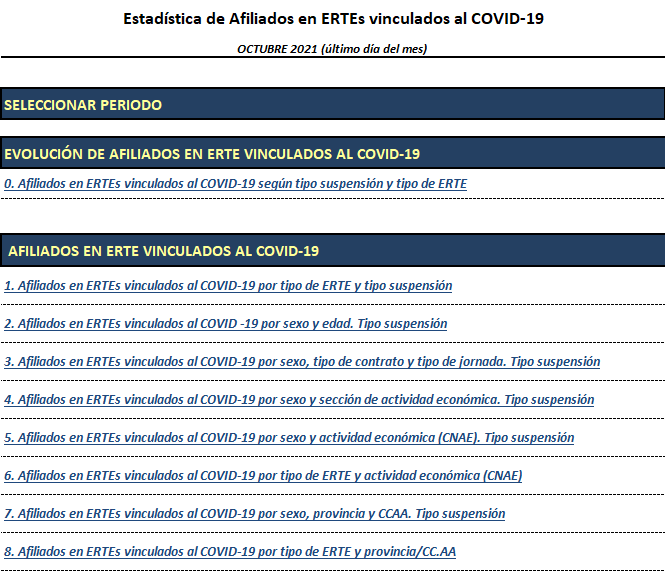

###**Pagina "0. Afiliados en ERTEs vinculados al COVID-19 según tipo suspensión y tipo de ERTE"**

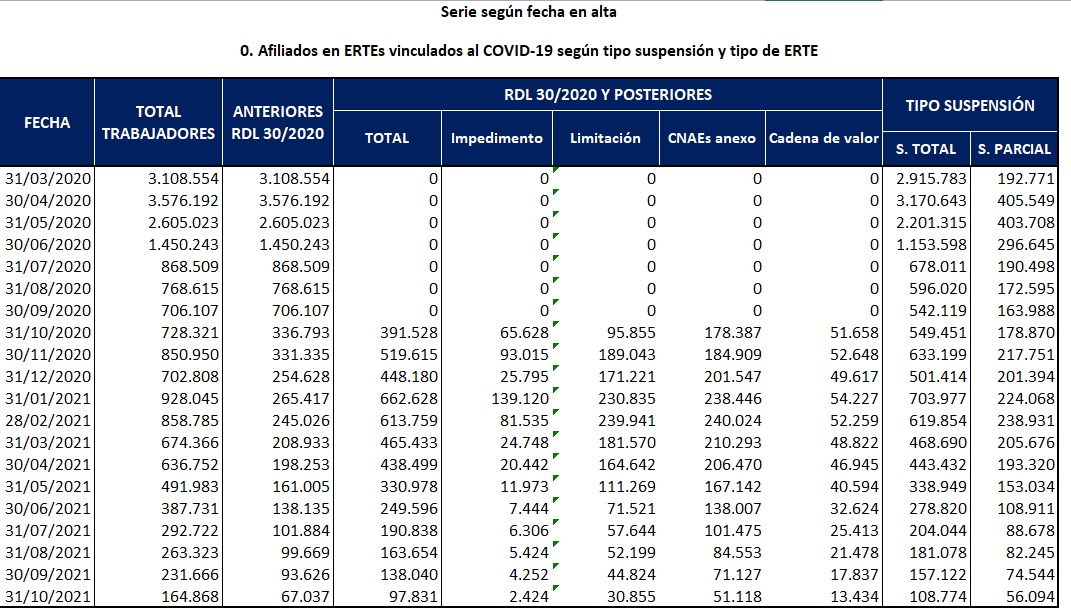

###**Pagina "5. Afiliados en ERTEs vinculados al COVID-19 por sexo y actividad económica (CNAE). Tipo suspensión"**

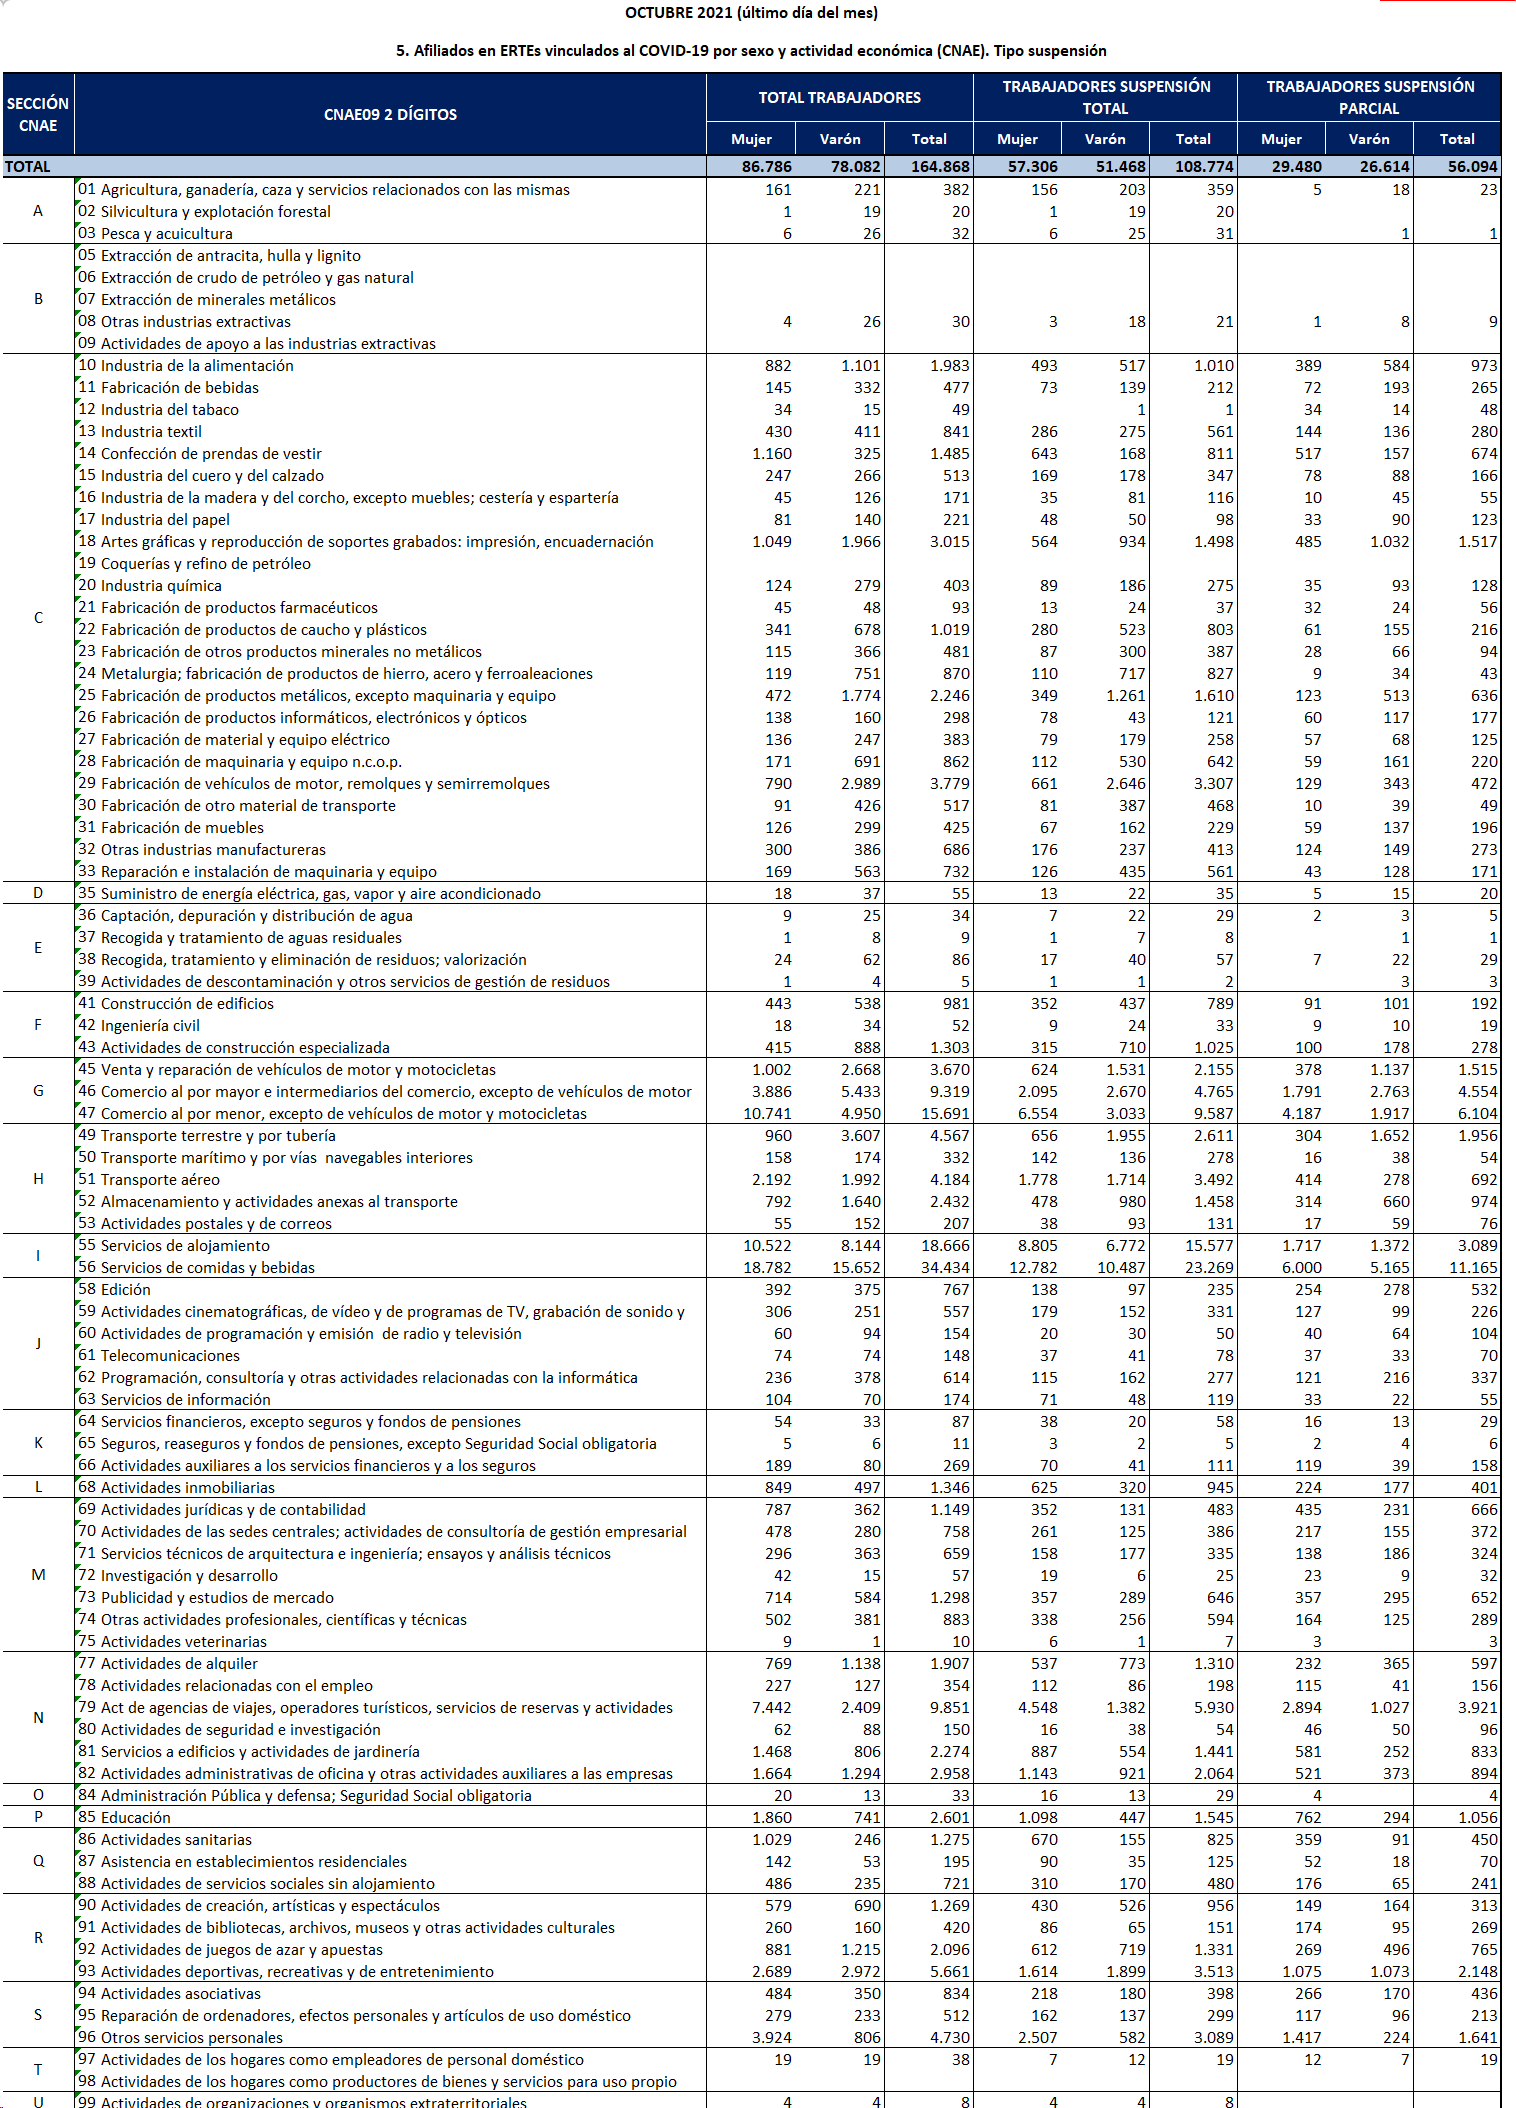

###**Pagina "7. Afiliados en ERTEs vinculados al COVID-19 por sexo, provincia y CCAA. Tipo suspensión"**

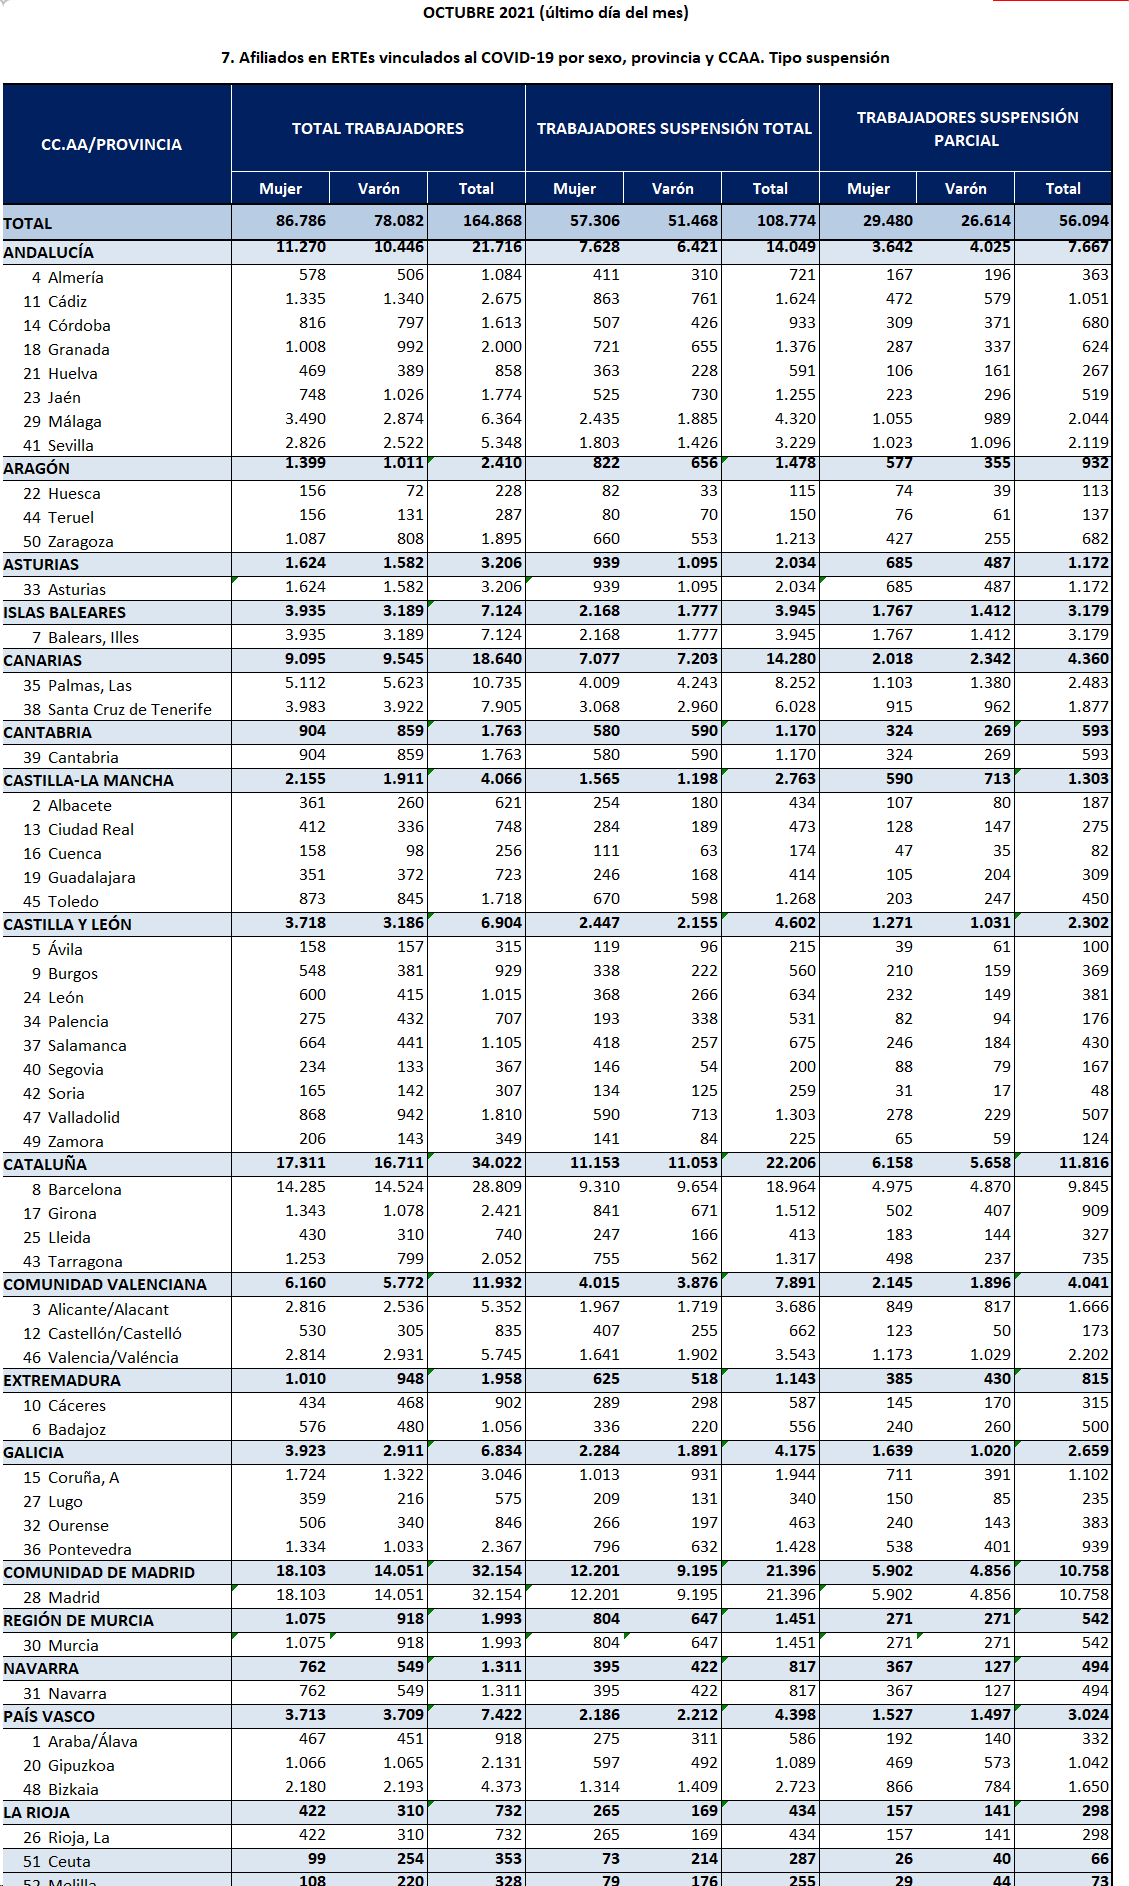

##**SEGUNDO ARCHIVO EXCEL (HASTA MARZO DE 2022)**

Esta siguiente imagén muestran las páginas en las que se divide el primer archivo excel, ocho en total. Además indica la fecha hasta la que se han recogido los datos, en este caso hasta marzo de 2022.

**Se han utilizado datos** de las páginas **"0. Afiliados en ERTEs según tipo suspensión y tipo de ERTE"**, la página **"5. Afiliados en ERTEs por sexo y actividad económica (CNAE). Tipo suspensión"** y la página **"7. Afiliados en ERTEs por sexo, provincia y CCAA. Tipo suspensión"**

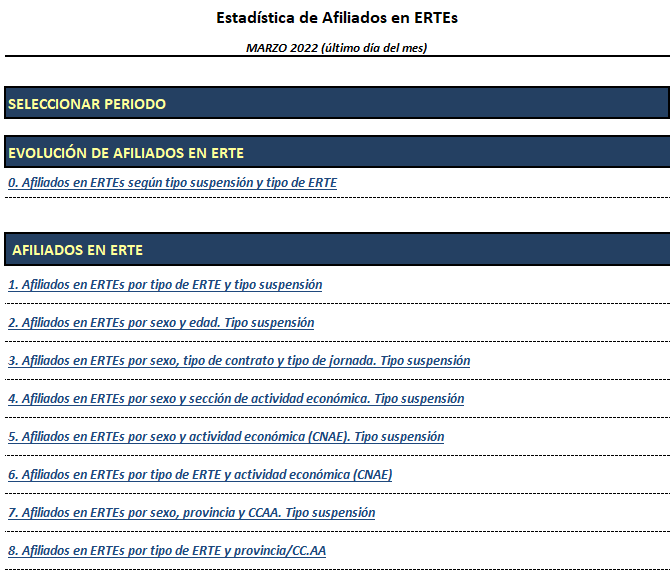

###**Pagina "0. Afiliados en ERTEs según tipo suspensión y tipo de ERTE"**

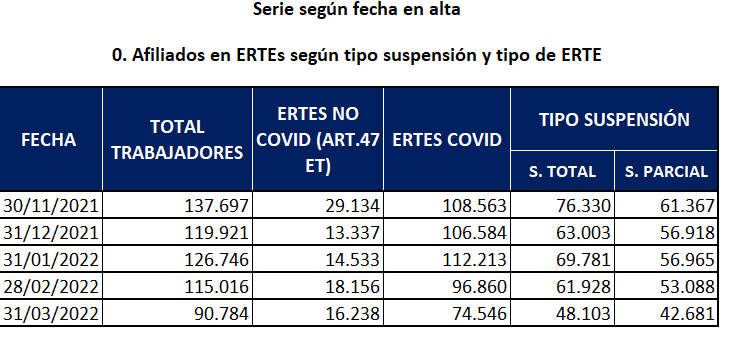

####**Pagina "5. Afiliados en ERTEs por sexo y actividad económica (CNAE). Tipo suspensión"**

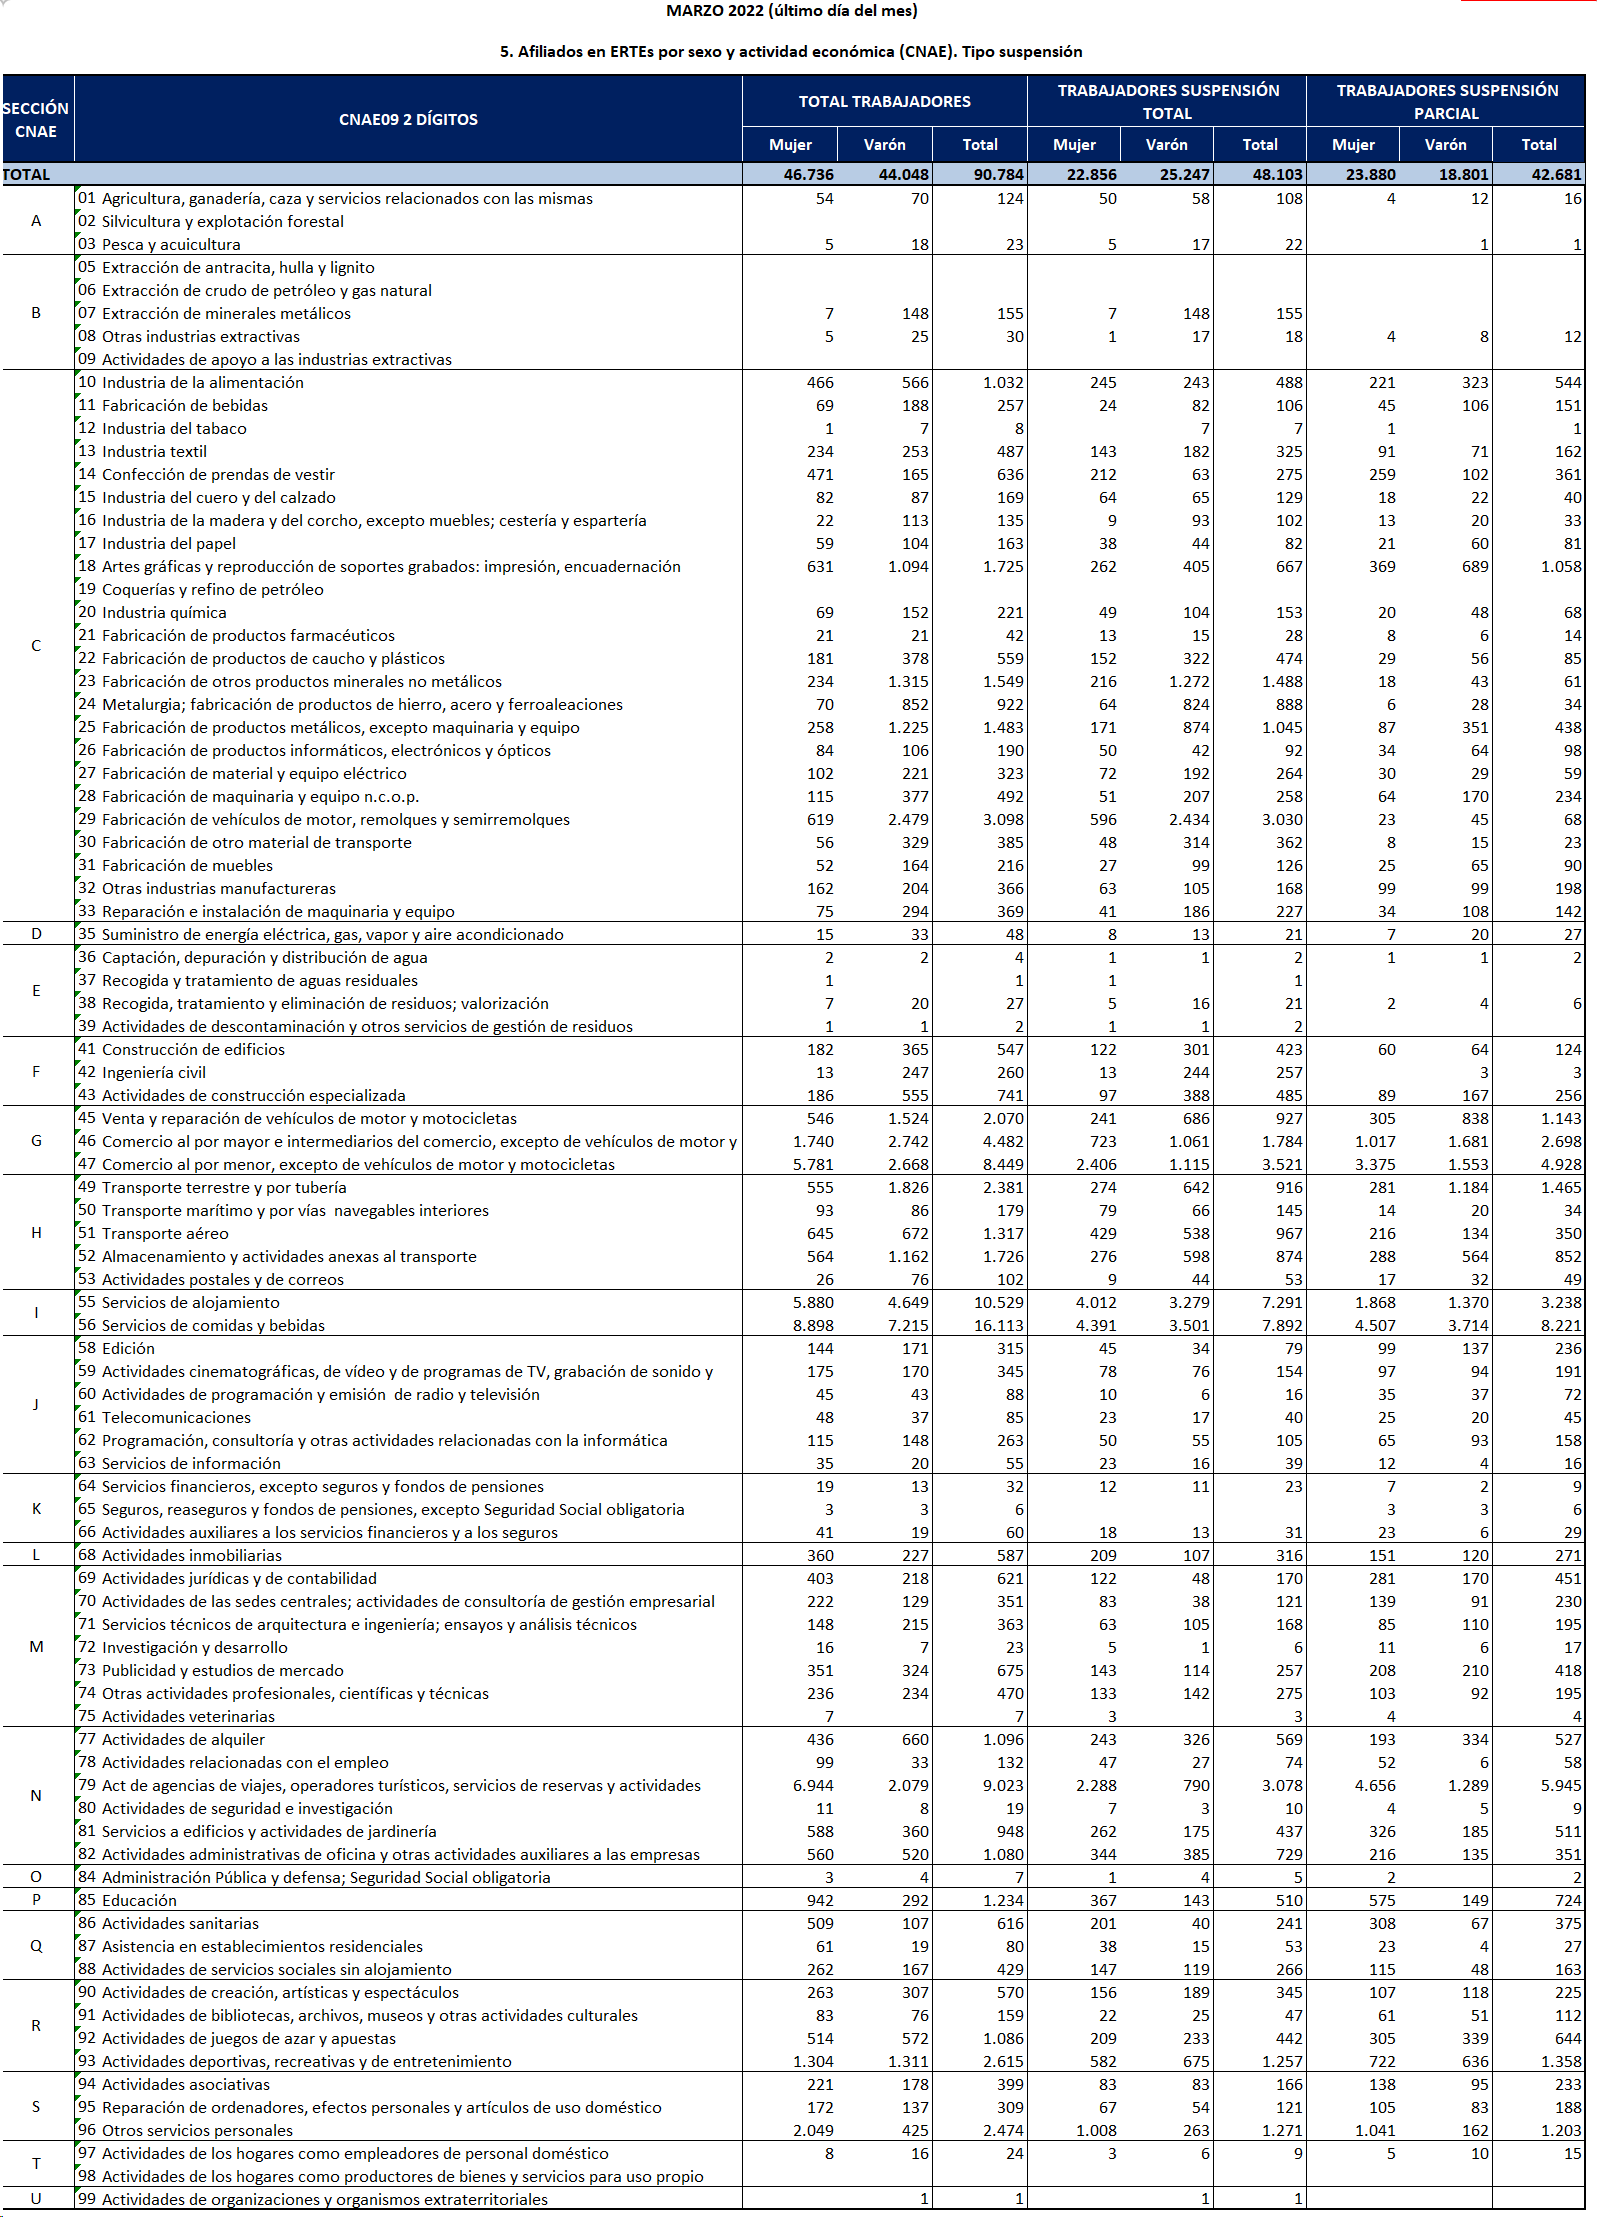

###**Pagina "7. Afiliados en ERTEs por sexo, provincia y CCAA. Tipo suspensión"**

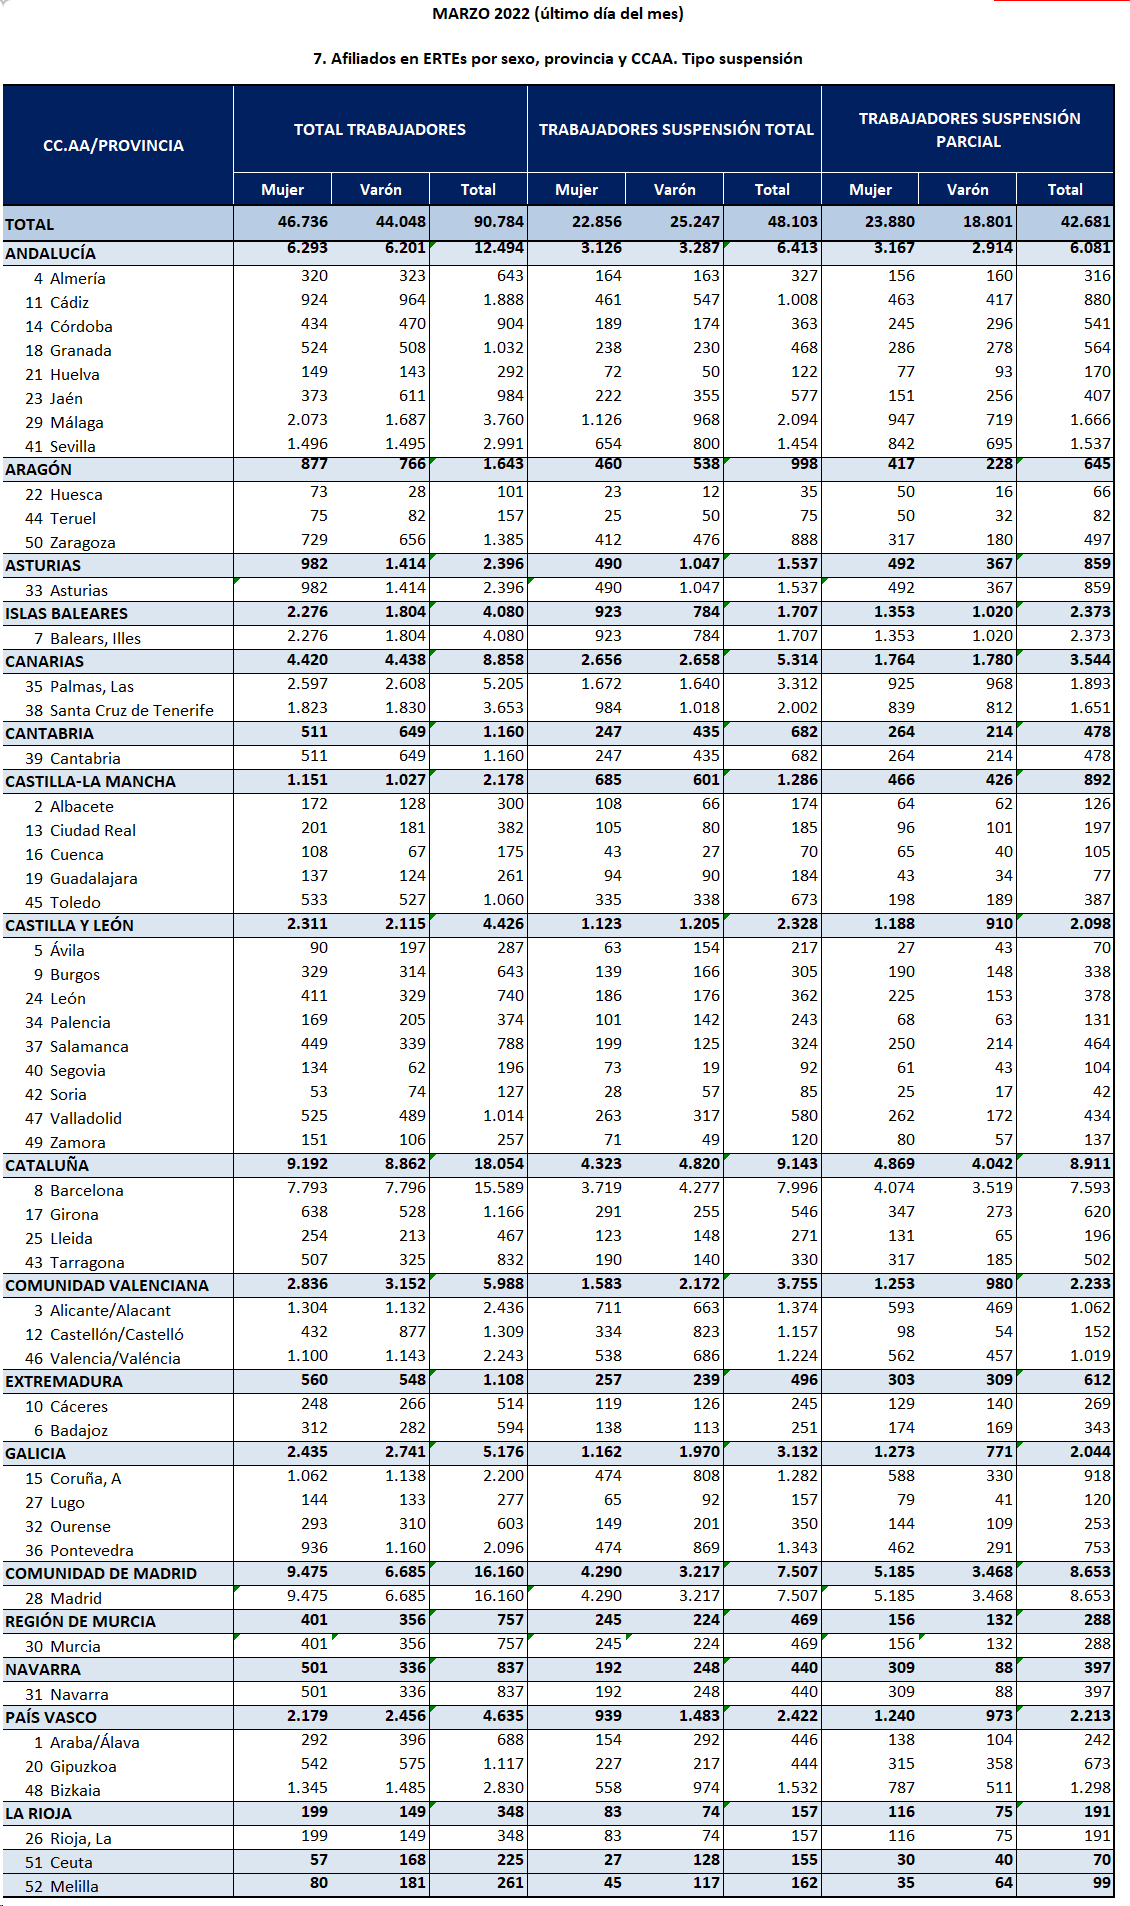

##**CREACIÓN DE LA BASE DE DATOS EN UNA SOLA TABLA**

Para crear la tabla primero de todo, se han seleccionado las variables que se iban a utilizar, en este caso son las siguientes:


**1.   Actividad económica:**Es una variable de tipo "String" que almacena el nombre de la actividad económica a la que hace referencia esa fila. Hay tanto actividades específicas como una que hace referencia a todas las actividades posíbles que marca el BOE. Se ha llevado a cabo previamente un limpiado de las actividades que no se habían mencionado en la BBDD 2 para que en un futuro se puedan relacionar.

**2.   Fecha:** Es una variable de tipo "fecha" o "Date," que almacena una fecha en el formato "dd/mm/aa". Realmente solo puede tomar dos valores que son "31/10/2021" y "31/03/2022".

**3.   Comunidad Autónoma:** Es una variable de tipo "String" que almacena el nombre de la Comunidad Autónoma a la que hace referencia esa fila. Están las 19 CCAA españolas así como el valor "Nacional" que hace referencia a la suma de todos las actividades económicas.

**4.   Tipo de ERTE:** Es una variable de texto que solo puede tomar dos valores diferentes, en este caso "Total" y "Parcial," se conoce comúnmente como una "variable binaria" o "variable dicotómica". Este tipo de variable es común en estadísticas y análisis de datos, y se utiliza para representar categorías o estados que tienen solo dos opciones posibles.

**5.   Número de ERTES:** Es una variable que solo puede tomar valores numéricos enteros, se llama comunmente "variable discreta". Las variables discretas son aquellas que representan datos contables o que solo pueden tener valores enteros, sin incluir valores intermedios.

###**A continuación importaremos la base de datos ya creada en un archivo csv para poder visualizar como ha quedado:**

In [29]:
import pandas as pd

# Cargar el archivo CSV
dfbbdd5 = pd.read_csv('/content/BBDD SEMIESTRUC.csv', sep=';', encoding='UTF-8')

#Verificamos
dfbbdd5.head()

,Actividad Económica,Fecha,Comunidad Autónoma,Tipo de ERTE,Número de ERTES
0,Actividades Primarias,31/10/2021,20 Nacional,Total,410
1,Industria manufacturera,31/10/2021,20 Nacional,Total,14592
2,"Suministro de energía eléctrica, gas, vapor y ...",31/10/2021,20 Nacional,Total,35
3,Construcción,31/10/2021,20 Nacional,Total,1847
4,Comercio al por mayor y al por menor; reparaci...,31/10/2021,20 Nacional,Total,16507


In [30]:
# Convertir la columna 'Fecha' a tipo datetime
dfbbdd5['Fecha'] = pd.to_datetime(dfbbdd5['Fecha'], format='%d/%m/%Y')

# Extraer el año y asignarlo a una nueva columna 'Año'
dfbbdd5['Año'] = dfbbdd5['Fecha'].dt.year

# Eliminar la columna 'Fecha' original
dfbbdd5.drop('Fecha', axis=1, inplace=True)

# Cambiamos el nombre de la columna ' Número de ERTES ' a 'Número de ERTES' para que sea el mismo que en el otro dataframe
dfbbdd5.rename(columns={' Número de ERTES ': 'Número de ERTES'}, inplace=True)


# Cambiamos el nombre de la columna 'Actividad Económica' a 'Actividad económica' para que sea el mismo que en la variable de "dfbbdd2"
dfbbdd5.rename(columns={'Actividad Económica	': 'Actividad económica'}, inplace=True)


# Verificar los cambios
dfbbdd5.head()



,Actividad Económica,Comunidad Autónoma,Tipo de ERTE,Número de ERTES,Año
0,Actividades Primarias,20 Nacional,Total,410,2021
1,Industria manufacturera,20 Nacional,Total,14592,2021
2,"Suministro de energía eléctrica, gas, vapor y ...",20 Nacional,Total,35,2021
3,Construcción,20 Nacional,Total,1847,2021
4,Comercio al por mayor y al por menor; reparaci...,20 Nacional,Total,16507,2021


In [31]:
import os

# Ruta del directorio donde guardar el archivo
directorio = 'C:/Users/jerez/Desktop/Curso 2023-2024/TFG/Entrega Anteproyecto/Data. CSV/BBDD LIMPIADAS'

# Ruta completa del archivo CSV
ruta_completa = os.path.join(directorio, 'dfbbdd5.csv')

# Guardar el DataFrame en la ruta especificada
dfbbdd5.to_csv(ruta_completa, index=True)

#Verificamos
dfbbdd5.head()

,Actividad Económica,Comunidad Autónoma,Tipo de ERTE,Número de ERTES,Año
0,Actividades Primarias,20 Nacional,Total,410,2021
1,Industria manufacturera,20 Nacional,Total,14592,2021
2,"Suministro de energía eléctrica, gas, vapor y ...",20 Nacional,Total,35,2021
3,Construcción,20 Nacional,Total,1847,2021
4,Comercio al por mayor y al por menor; reparaci...,20 Nacional,Total,16507,2021


#**6) LIMPIADO DE LA OCTAVA BASE DE DATOS**

##**Procedemos a cargar y limpiar los datos para generar el csv limpio que utilizaremos finalmente**

In [32]:
import pandas as pd

# Cargar el archivo CSV
dfbbdd6 = pd.read_csv('/content/BBDD 8.csv', sep=';', encoding='UTF-8')

#Verificamos
dfbbdd6.head()

,Año,Periodo,Afiliados a la Seguridad Social
0,2020,Día 1 de marzo,488
1,2020,Día 2 de marzo,3.294
2,2020,Día 3 de marzo,888
3,2020,Día 4 de marzo,905
4,2020,Día 5 de marzo,1.221


###***Comenzamos con el limpiado de la base de datos y procedemos a hacer los siguientes cambios:***

1. Cambiar el valor formato de la variable "Periodo" a un formato 'dd/mm'.

2. Combinar las columnas de "Periodo" y "Año" para crear una nueva que se llame "Fecha".

3. Dejar el dataframe solo con dos variables "Fecha" y "Afiliados a la Seguridad Social".

In [33]:
meses = {
    'enero': '01',
    'febrero': '02',
    'marzo': '03',
    'abril': '04',
    'mayo': '05',
    'junio': '06',
    'julio': '07',
    'agosto': '08',
    'septiembre': '09',
    'octubre': '10',
    'noviembre': '11',
    'diciembre': '12'
}

def transformar_fecha(fecha):
    try:
        partes = fecha.split(' ')
        # Para segurarse de que la fecha tiene el formato esperado
        if len(partes) == 4 and partes[0].lower() == 'día':
            dia = partes[1]
            mes = meses.get(partes[3].lower(), '00')  # Usar '00' si el mes no se encuentra
            return f'{dia}/{mes}'
        else:
            return 'Fecha inválida'
    except IndexError:
        return 'Error en la fecha'

# Aplicar la transformación a la columna 'Periodo'
dfbbdd6['Periodo'] = dfbbdd6['Periodo'].apply(transformar_fecha)

# Verificar los cambios
dfbbdd6.head()


,Año,Periodo,Afiliados a la Seguridad Social
0,2020,1/03,488
1,2020,2/03,3.294
2,2020,3/03,888
3,2020,4/03,905
4,2020,5/03,1.221


In [34]:
# Asegúrate de que la columna 'Año' sea de tipo string
dfbbdd6['Año'] = dfbbdd6['Año'].astype(str)

# Combina las columnas 'Periodo' y 'Año'
dfbbdd6['Fecha'] = dfbbdd6['Periodo'] + '/' + dfbbdd6['Año'].str[-2:]

# Eliminar las columnas 'Año' y 'Periodo'
dfbbdd6.drop(['Año', 'Periodo'], axis=1, inplace=True)

# Reordenar las columnas
dfbbdd6 = dfbbdd6[['Fecha', 'Afiliados a la Seguridad Social']]

# Verificar los cambios
dfbbdd6.head()


,Fecha,Afiliados a la Seguridad Social
0,1/03/20,488
1,2/03/20,3.294
2,3/03/20,888
3,4/03/20,905
4,5/03/20,1.221


##**Por último una vez tenemos la base de datos limpia, guardamos el archivo csv y lo descargamos**

In [35]:
import os

# Ruta del directorio donde quieres guardar el archivo
directorio = 'C:/Users/jerez/Desktop/Curso 2023-2024/TFG/Entrega Anteproyecto/Data. CSV/BBDD LIMPIADAS'

# Ruta completa del archivo CSV
ruta_completa = os.path.join(directorio, 'dfbbdd6.csv')

# Guardar el DataFrame en la ruta especificada
dfbbdd6.to_csv(ruta_completa, index=True)


# **ANÁLISIS EXPLORATORIO DE DATOS**

##**Descripción de medidas de tendencia central y dispersión para las variables cuantitativas.**

In [36]:
# Convertir a flotante
dfbbdd1['Número Sociedades/Capital'] = dfbbdd1['Número Sociedades/Capital'].astype(float)

# Eliminar todos los puntos
dfbbdd1['Población'] = dfbbdd1['Población'].str.replace('.', '')

# Convertir a flotante
dfbbdd1['Población'] = dfbbdd1['Población'].astype(float)

# Convertir a flotante
dfbbdd5['Número de ERTES'] = dfbbdd5['Número de ERTES'].astype(float)

# Eliminar todos los puntos
dfbbdd6['Afiliados a la Seguridad Social'] = dfbbdd6['Afiliados a la Seguridad Social'].str.replace('.', '')

# Convertir a flotante
dfbbdd6['Afiliados a la Seguridad Social'] = dfbbdd6['Afiliados a la Seguridad Social'].astype(float)

# Convertir a flotante
dfbbdd1['Año'] = dfbbdd1['Año'].astype(float)

###**Medidas de Tendencia Central**

In [37]:
#BASE DE DATOS 1

#Variable 'Año'
suma11 = dfbbdd1['Año'].sum()
conteo11 = dfbbdd1['Año'].count()

media11 = suma11 / conteo11
mediana11 = dfbbdd1['Año'].median()
moda11 = dfbbdd1['Año'].mode()

#Variable 'Número Sociedades/Capital'
media12 = dfbbdd1['Número Sociedades/Capital'].mean()
mediana12 = dfbbdd1['Número Sociedades/Capital'].median()
moda12 = dfbbdd1['Número Sociedades/Capital'].mode()

#Variable 'Población'
media13 = dfbbdd1['Población'].mean()
mediana13 = dfbbdd1['Población'].median()
moda13 = dfbbdd1['Población'].mode()




In [38]:
import pandas as pd

#Numéros Correspondiente a la Primera Base de datos
print("Media de 'Año':", media11)
print("Mediana de 'Año':", mediana11)
print("Moda de 'Año':", moda11[0])

print("\n")

print("Media de 'Número Sociedades/Capital':", media12)
print("Mediana de 'Número Sociedades/Capital':", mediana12)
print("Moda de 'Número Sociedades/Capital':", moda12[0])

print("\n")

print("Media de 'Población':", media13)
print("Mediana de 'Población':", mediana13)
print("Moda de 'Población':", moda13[0])

Media de 'Año': 2011.0
Mediana de 'Año': 2011.0
Moda de 'Año': 2000.0


Media de 'Número Sociedades/Capital': 90.53089996092223
Mediana de 'Número Sociedades/Capital': 6.0
Moda de 'Número Sociedades/Capital': 0.0


Media de 'Población': 2397012.4553775745
Mediana de 'Población': 1464847.0
Moda de 'Población': 1107220.0


In [39]:
#BASE DE DATOS 2

#Variable 'Año'
media21 = dfbbdd2['Año'].mean()
mediana21 = dfbbdd2['Año'].median()
moda21 = dfbbdd2['Año'].mode()

#Variable 'Número Sociedades'
media22 = dfbbdd2['Número Sociedades'].mean()
mediana22 = dfbbdd2['Número Sociedades'].median()
moda22 = dfbbdd2['Número Sociedades'].mode()

In [40]:
#Numéros Correspondiente a la Segunda Base de datos
print("Media de 'Año':", media21)
print("Mediana de 'Año':", mediana21)
print("Moda de 'Año':", moda21[0])

print("\n")

print("Media de 'Número Sociedades':", media22)
print("Mediana de 'Número Sociedades':", mediana22)
print("Moda de 'Número Sociedades':", moda22[0])


Media de 'Año': 2017.0
Mediana de 'Año': 2017.0
Moda de 'Año': 2012


Media de 'Número Sociedades': 109.09074380165289
Mediana de 'Número Sociedades': 98.17
Moda de 'Número Sociedades': 13.8


In [41]:
#BASE DE DATOS 3

#Variable 'Año'
media31 = dfbbdd3['Año'].mean()
mediana31 = dfbbdd3['Año'].median()
moda31 = dfbbdd3['Año'].mode()

#Variable 'Número Sociedades'
media32 = dfbbdd3['Número Sociedades'].mean()
mediana32 = dfbbdd3['Número Sociedades'].median()
moda32 = dfbbdd3['Número Sociedades'].mode()

In [42]:
#Numéros Correspondiente a la Tercera Base de datos
print("Media de 'Año':", media31)
print("Mediana de 'Año':", mediana31)
print("Moda de 'Año':", moda31[0])

print("\n")

print("Media de 'Número Sociedades':", media32)
print("Mediana de 'Número Sociedades':", mediana32)
print("Moda de 'Número Sociedades':", moda32[0])

Media de 'Año': 2017.0
Mediana de 'Año': 2017.0
Moda de 'Año': 2012


Media de 'Número Sociedades': 397.0414673046252
Mediana de 'Número Sociedades': 124.0
Moda de 'Número Sociedades': 0


In [43]:
#BASE DE DATOS 4

#Variable 'Año'
media41 = dfbbdd4['Año'].mean()
mediana41 = dfbbdd4['Año'].median()
moda41 = dfbbdd4['Año'].mode()

#Variable 'Valor Indicador'
media42 = dfbbdd4['Valor Indicador'].mean()
mediana42 = dfbbdd4['Valor Indicador'].median()
moda42 = dfbbdd4['Valor Indicador'].mode()

In [44]:
#Numéros Correspondiente a la Cuarta Base de datos
print("Media de 'Año':", media41)
print("Mediana de 'Año':", mediana41)
print("Moda de 'Año':", moda41[0])

print("\n")

print("Media de 'Valor Indicador':", media42)
print("Mediana de 'Valor Indicador':", mediana42)
print("Moda de 'Valor Indicador':", moda42[0])

Media de 'Año': 2017.5
Mediana de 'Año': 2017.5
Moda de 'Año': 2013


Media de 'Valor Indicador': 124.35882352941177
Mediana de 'Valor Indicador': 126.5
Moda de 'Valor Indicador': 132


In [45]:
#BASE DE DATOS 5

#Variable 'Número de ERTES'
media51 = dfbbdd5['Número de ERTES'].mean()
mediana51 = dfbbdd5['Número de ERTES'].median()
moda51 = dfbbdd5['Número de ERTES'].mode()

#Variable 'Año'
media52 = dfbbdd5['Año'].mean()
mediana52 = dfbbdd5['Año'].median()
moda52 = dfbbdd5['Año'].mode()

In [46]:
#Numéros Correspondiente a la Quinta Base de datos
print("Media de 'Número de ERTES':", media51)
print("Mediana de 'Número de ERTES':", mediana51)
print("Moda de 'Número de ERTES':", moda51[0])

print("\n")

print("Media de 'Año':", media52)
print("Mediana de 'Año':", mediana52)
print("Moda de 'Año':", moda52[0])

Media de 'Número de ERTES': 3934.2741935483873
Mediana de 'Número de ERTES': 1777.0
Moda de 'Número de ERTES': 17.0


Media de 'Año': 2021.5
Mediana de 'Año': 2021.5
Moda de 'Año': 2021


In [47]:
#BASE DE DATOS 6

#Variable 'Valor Indicador'
media61 = dfbbdd6['Afiliados a la Seguridad Social'].mean()
mediana61 = dfbbdd6['Afiliados a la Seguridad Social'].median()
moda61 = dfbbdd6['Afiliados a la Seguridad Social'].mode()

In [48]:
#Numéros Correspondiente a la Sexta Base de datos
print("Media de 'Afiliados a la Seguridad Social':", media61)
print("Mediana de 'Afiliados a la Seguridad Social':", mediana61)
print("Moda de 'Afiliados a la Seguridad Social':", moda61[0])


Media de 'Afiliados a la Seguridad Social': 915199.7189835575
Mediana de 'Afiliados a la Seguridad Social': 705812.0
Moda de 'Afiliados a la Seguridad Social': 705812.0


###**Medidas de Dispersión**

In [49]:
#BASE DE DATOS 1

#Variable 'Año'
rango11 = dfbbdd1['Año'].max() - dfbbdd1['Año'].min()
varianza11 = dfbbdd1['Año'].var()
desviacion_estandar11 = dfbbdd1['Año'].std()
Q111 = dfbbdd1['Año'].quantile(0.25)
Q311 = dfbbdd1['Año'].quantile(0.75)
IQR11 = Q311 - Q111

#Variable 'Número Sociedades/Capital'
rango12 = dfbbdd1['Número Sociedades/Capital'].max() - dfbbdd1['Número Sociedades/Capital'].min()
varianza12 = dfbbdd1['Número Sociedades/Capital'].var()
desviacion_estandar12 = dfbbdd1['Número Sociedades/Capital'].std()
Q112 = dfbbdd1['Número Sociedades/Capital'].quantile(0.25)
Q312 = dfbbdd1['Número Sociedades/Capital'].quantile(0.75)
IQR12 = Q312 - Q112

#Variable 'Población'
rango13 = dfbbdd1['Población'].max() - dfbbdd1['Población'].min()
varianza13 = dfbbdd1['Población'].var()
desviacion_estandar13 = dfbbdd1['Población'].std()
Q113 = dfbbdd1['Población'].quantile(0.25)
Q313 = dfbbdd1['Población'].quantile(0.75)
IQR13 = Q313 - Q113


#Print de la variable 'Año'
print("Rango de 'Año':", rango11)
print("Varianza de 'Año':", varianza11)
print("Desviación Estándar de 'Año':", desviacion_estandar11)
print("Rango Intercuartílico (IQR) de 'Año':",IQR11)

print("\n")

#Print de la variable 'Número Sociedades/Capital'
print("Rango de 'Número Sociedades/Capital':", rango12)
print("Varianza de 'Número Sociedades/Capital':", varianza12)
print("Desviación Estándar de 'Número Sociedades/Capital':", desviacion_estandar12)
print("Rango Intercuartílico (IQR) de 'Número Sociedades/Capital':",IQR12)

print("\n")

#Print de la variable 'Población'
print("Rango de 'Población':", rango13)
print("Varianza de 'Población':", varianza13)
print("Desviación Estándar de 'Población':", desviacion_estandar13)
print("Rango Intercuartílico (IQR) de 'Población':",IQR13)

Rango de 'Año': 22.0
Varianza de 'Año': 44.01678748569248
Desviación Estándar de 'Año': 6.6345148643810035
Rango Intercuartílico (IQR) de 'Año': 12.0


Rango de 'Número Sociedades/Capital': 997.0
Varianza de 'Número Sociedades/Capital': 38209.705292837534
Desviación Estándar de 'Número Sociedades/Capital': 195.47302957911492
Rango Intercuartílico (IQR) de 'Número Sociedades/Capital': 66.73849999999999


Rango de 'Población': 8445679.0
Varianza de 'Población': 5693262396225.573
Desviación Estándar de 'Población': 2386055.8242056225
Rango Intercuartílico (IQR) de 'Población': 2063773.0


In [50]:
#BASE DE DATOS 2

#Variable 'Año'
rango21 = dfbbdd2['Año'].max() - dfbbdd2['Año'].min()
varianza21 = dfbbdd2['Año'].var()
desviacion_estandar21 = dfbbdd2['Año'].std()
Q121 = dfbbdd2['Año'].quantile(0.25)
Q321 = dfbbdd2['Año'].quantile(0.75)
IQR21 = Q321 - Q121

#Variable 'Número Sociedades'
rango22 = dfbbdd2['Número Sociedades'].max() - dfbbdd2['Número Sociedades'].min()
varianza22 = dfbbdd2['Número Sociedades'].var()
desviacion_estandar22 = dfbbdd2['Número Sociedades'].std()
Q122 = dfbbdd2['Número Sociedades'].quantile(0.25)
Q322= dfbbdd2['Número Sociedades'].quantile(0.75)
IQR22 = Q322 - Q122


#Print de la variable 'Año'
print("Rango de 'Año':", rango21)
print("Varianza de 'Año':", varianza21)
print("Desviación Estándar de 'Año':", desviacion_estandar21)
print("Rango Intercuartílico (IQR) de 'Año':",IQR21)

print("\n")

#Print de la variable 'Número Sociedades'
print("Rango de 'Número Sociedades':", rango22)
print("Varianza de 'Número Sociedades':", varianza22)
print("Desviación Estándar de Número Sociedades':", desviacion_estandar22)
print("Rango Intercuartílico (IQR) de 'Número Sociedades':",IQR22)

Rango de 'Año': 10
Varianza de 'Año': 10.04149377593361
Desviación Estándar de 'Año': 3.1688316105362255
Rango Intercuartílico (IQR) de 'Año': 6.0


Rango de 'Número Sociedades': 280.0
Varianza de 'Número Sociedades': 5013.293836788862
Desviación Estándar de Número Sociedades': 70.80461734088294
Rango Intercuartílico (IQR) de 'Número Sociedades': 87.865


In [51]:
#BASE DE DATOS 3

#Variable 'Año'
rango31 = dfbbdd3['Año'].max() - dfbbdd3['Año'].min()
varianza31 = dfbbdd3['Año'].var()
desviacion_estandar31 = dfbbdd3['Año'].std()
Q131 = dfbbdd3['Año'].quantile(0.25)
Q331 = dfbbdd3['Año'].quantile(0.75)
IQR31 = Q331 - Q131

#Variable 'Número Sociedades'
rango32 = dfbbdd3['Número Sociedades'].max() - dfbbdd3['Número Sociedades'].min()
varianza32 = dfbbdd3['Número Sociedades'].var()
desviacion_estandar32 = dfbbdd3['Número Sociedades'].std()
Q132 = dfbbdd3['Número Sociedades'].quantile(0.25)
Q332= dfbbdd3['Número Sociedades'].quantile(0.75)
IQR32 = Q332 - Q132


#Print de la variable 'Año'
print("Rango de 'Año':", rango31)
print("Varianza de 'Año':", varianza31)
print("Desviación Estándar de 'Año':", desviacion_estandar31)
print("Rango Intercuartílico (IQR) de 'Año':",IQR31)

print("\n")

#Print de la variable 'Número Sociedades'
print("Rango de 'Número Sociedades':", rango32)
print("Varianza de 'Número Sociedades':", varianza32)
print("Desviación Estándar de Número Sociedades':", desviacion_estandar32)
print("Rango Intercuartílico (IQR) de 'Número Sociedades':",IQR32)

Rango de 'Año': 10
Varianza de 'Año': 10.015974440894569
Desviación Estándar de 'Año': 3.1648024331535405
Rango Intercuartílico (IQR) de 'Año': 6.0


Rango de 'Número Sociedades': 6907
Varianza de 'Número Sociedades': 593934.5158496008
Desviación Estándar de Número Sociedades': 770.671470764035
Rango Intercuartílico (IQR) de 'Número Sociedades': 350.0


In [52]:
#BASE DE DATOS 4

#Variable 'Año'
rango41 = dfbbdd4['Año'].max() - dfbbdd4['Año'].min()
varianza41 = dfbbdd4['Año'].var()
desviacion_estandar41 = dfbbdd4['Año'].std()
Q141 = dfbbdd4['Año'].quantile(0.25)
Q341 = dfbbdd4['Año'].quantile(0.75)
IQR41 = Q341 - Q141

#Variable 'Valor Indicador'
rango42 = dfbbdd4['Valor Indicador'].max() - dfbbdd4['Valor Indicador'].min()
varianza42 = dfbbdd4['Valor Indicador'].var()
desviacion_estandar42 = dfbbdd4['Valor Indicador'].std()
Q142 = dfbbdd4['Valor Indicador'].quantile(0.25)
Q342= dfbbdd4['Valor Indicador'].quantile(0.75)
IQR42 = Q342 - Q142


#Print de la variable 'Año'
print("Rango de 'Año':", rango41)
print("Varianza de 'Año':", varianza41)
print("Desviación Estándar de 'Año':", desviacion_estandar41)
print("Rango Intercuartílico (IQR) de 'Año':",IQR41)

print("\n")

#Print de la variable 'Valor Indicador'
print("Rango de 'Valor Indicador':", rango42)
print("Varianza de 'Valor Indicador':", varianza42)
print("Desviación Estándar de 'Valor Indicador':", desviacion_estandar42)
print("Rango Intercuartílico (IQR) de 'Valor Indicador':",IQR42)

Rango de 'Año': 9
Varianza de 'Año': 8.298816568047338
Desviación Estándar de 'Año': 2.8807666632421545
Rango Intercuartílico (IQR) de 'Año': 5.0


Rango de 'Valor Indicador': 47
Varianza de 'Valor Indicador': 126.10125304559695
Desviación Estándar de 'Valor Indicador': 11.229481423716633
Rango Intercuartílico (IQR) de 'Valor Indicador': 16.75


In [53]:
#BASE DE DATOS 5

#Variable 'Año'
rango51 = dfbbdd5['Año'].max() - dfbbdd5['Año'].min()
varianza51 = dfbbdd5['Año'].var()
desviacion_estandar51 = dfbbdd5['Año'].std()
Q151 = dfbbdd5['Año'].quantile(0.25)
Q351 = dfbbdd5['Año'].quantile(0.75)
IQR51 = Q351 - Q151

#Variable 'Número de ERTES'
rango52 = dfbbdd5['Número de ERTES'].max() - dfbbdd5['Número de ERTES'].min()
varianza52 = dfbbdd5['Número de ERTES'].var()
desviacion_estandar52 = dfbbdd5['Número de ERTES'].std()
Q152 = dfbbdd5['Número de ERTES'].quantile(0.25)
Q352= dfbbdd5['Número de ERTES'].quantile(0.75)
IQR52 = Q352 - Q152


#Print de la variable 'Año'
print("Rango de 'Año':", rango51)
print("Varianza de 'Año':", varianza51)
print("Desviación Estándar de 'Año':", desviacion_estandar51)
print("Rango Intercuartílico (IQR) de 'Año':",IQR51)

print("\n")

#Print de la variable 'Número de ERTES'
print("Rango de 'Número de ERTES':", rango52)
print("Varianza de 'Número de ERTES':", varianza52)
print("Desviación Estándar de 'Número de ERTES':", desviacion_estandar52)
print("Rango Intercuartílico (IQR) de 'Número de ERTES':",IQR52)

Rango de 'Año': 1
Varianza de 'Año': 0.25203252032520324
Desviación Estándar de 'Año': 0.5020284058947294
Rango Intercuartílico (IQR) de 'Año': 1.0


Rango de 'Número de ERTES': 38829.0
Varianza de 'Número de ERTES': 31286261.517702598
Desviación Estándar de 'Número de ERTES': 5593.412332172786
Rango Intercuartílico (IQR) de 'Número de ERTES': 4189.5


In [54]:
#BASE DE DATOS 6

#Variable 'Afiliados a la Seguridad Social'
rango61 = dfbbdd6['Afiliados a la Seguridad Social'].max() - dfbbdd6['Afiliados a la Seguridad Social'].min()
varianza61 = dfbbdd6['Afiliados a la Seguridad Social'].var()
desviacion_estandar61 = dfbbdd6['Afiliados a la Seguridad Social'].std()
Q161 = dfbbdd6['Afiliados a la Seguridad Social'].quantile(0.25)
Q361 = dfbbdd6['Afiliados a la Seguridad Social'].quantile(0.75)
IQR61 = Q361 - Q161

#Print de la variable 'Afiliados a la Seguridad Social'
print("Rango de 'Afiliados a la Seguridad Social':", rango61)
print("Varianza de 'Afiliados a la Seguridad Social':", varianza61)
print("Desviación Estándar de 'Afiliados a la Seguridad Social':", desviacion_estandar61)
print("Rango Intercuartílico (IQR) de 'Afiliados a la Seguridad Social':",IQR61)

Rango de 'Afiliados a la Seguridad Social': 3616717.0
Varianza de 'Afiliados a la Seguridad Social': 841433388713.4897
Desviación Estándar de 'Afiliados a la Seguridad Social': 917296.7833332295
Rango Intercuartílico (IQR) de 'Afiliados a la Seguridad Social': 601390.0


##**Frecuencias y proporciones para las variables categóricas**

###**Cálculo de Frecuencias y Proporciones**

In [55]:
dfbbdd2.columns

Index(['Estados Sociedades', 'Actividad económica', 'Año',
       'Número Sociedades'],
      dtype='object')

Text(0.5, 1.0, 'dfbbdd5')

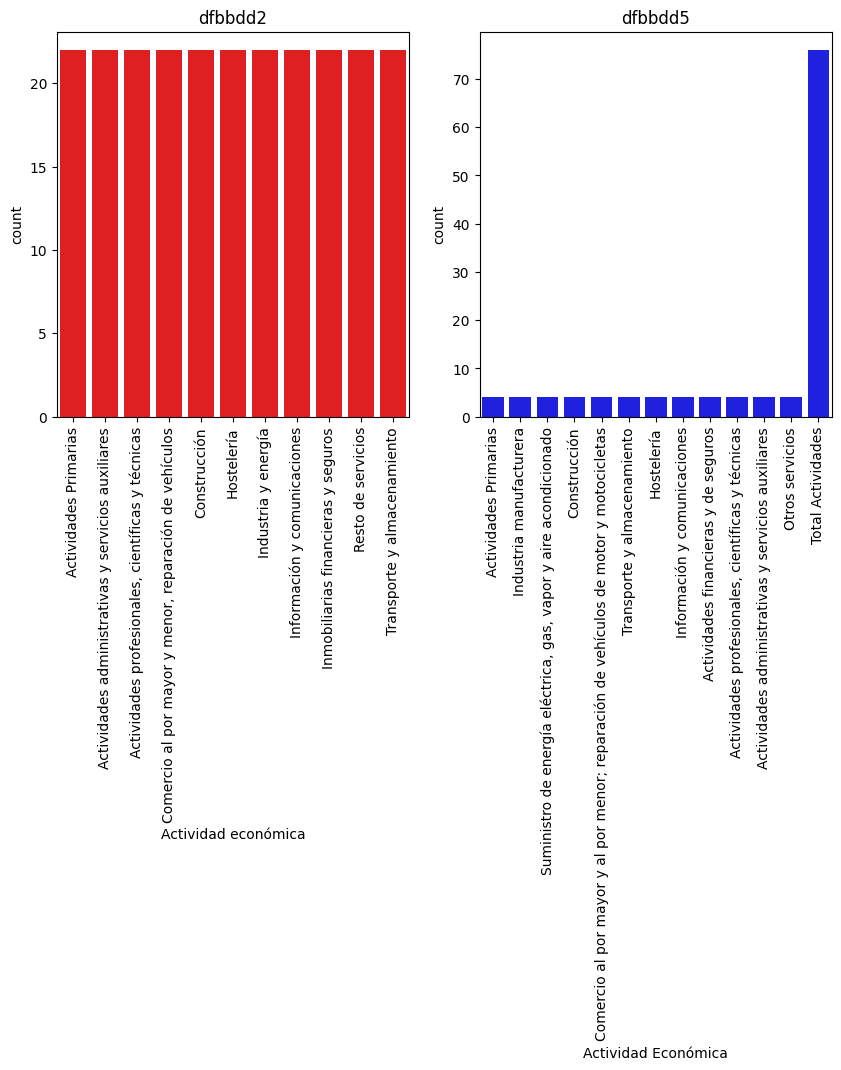

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

#Tamaño de la figura que contendrá todos los subgráficos
plt.figure(figsize=(10, 5))

# Gráfico 1
plt.subplot(1, 2, 1)
sns.countplot(data=dfbbdd2, x='Actividad económica', color='red')
plt.xticks(rotation=90)
plt.title('dfbbdd2')

# Gráfico 2
plt.subplot(1, 2, 2)
sns.countplot(data=dfbbdd5, x='Actividad Económica', color='blue')
plt.xticks(rotation=90)
plt.title('dfbbdd5')

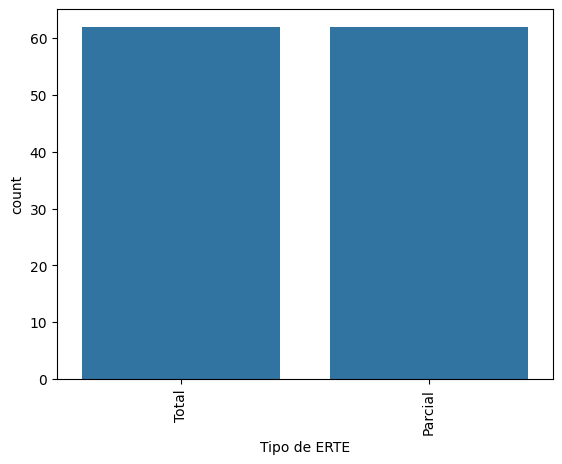

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=dfbbdd5, x='Tipo de ERTE')
plt.xticks(rotation=90)
plt.show()

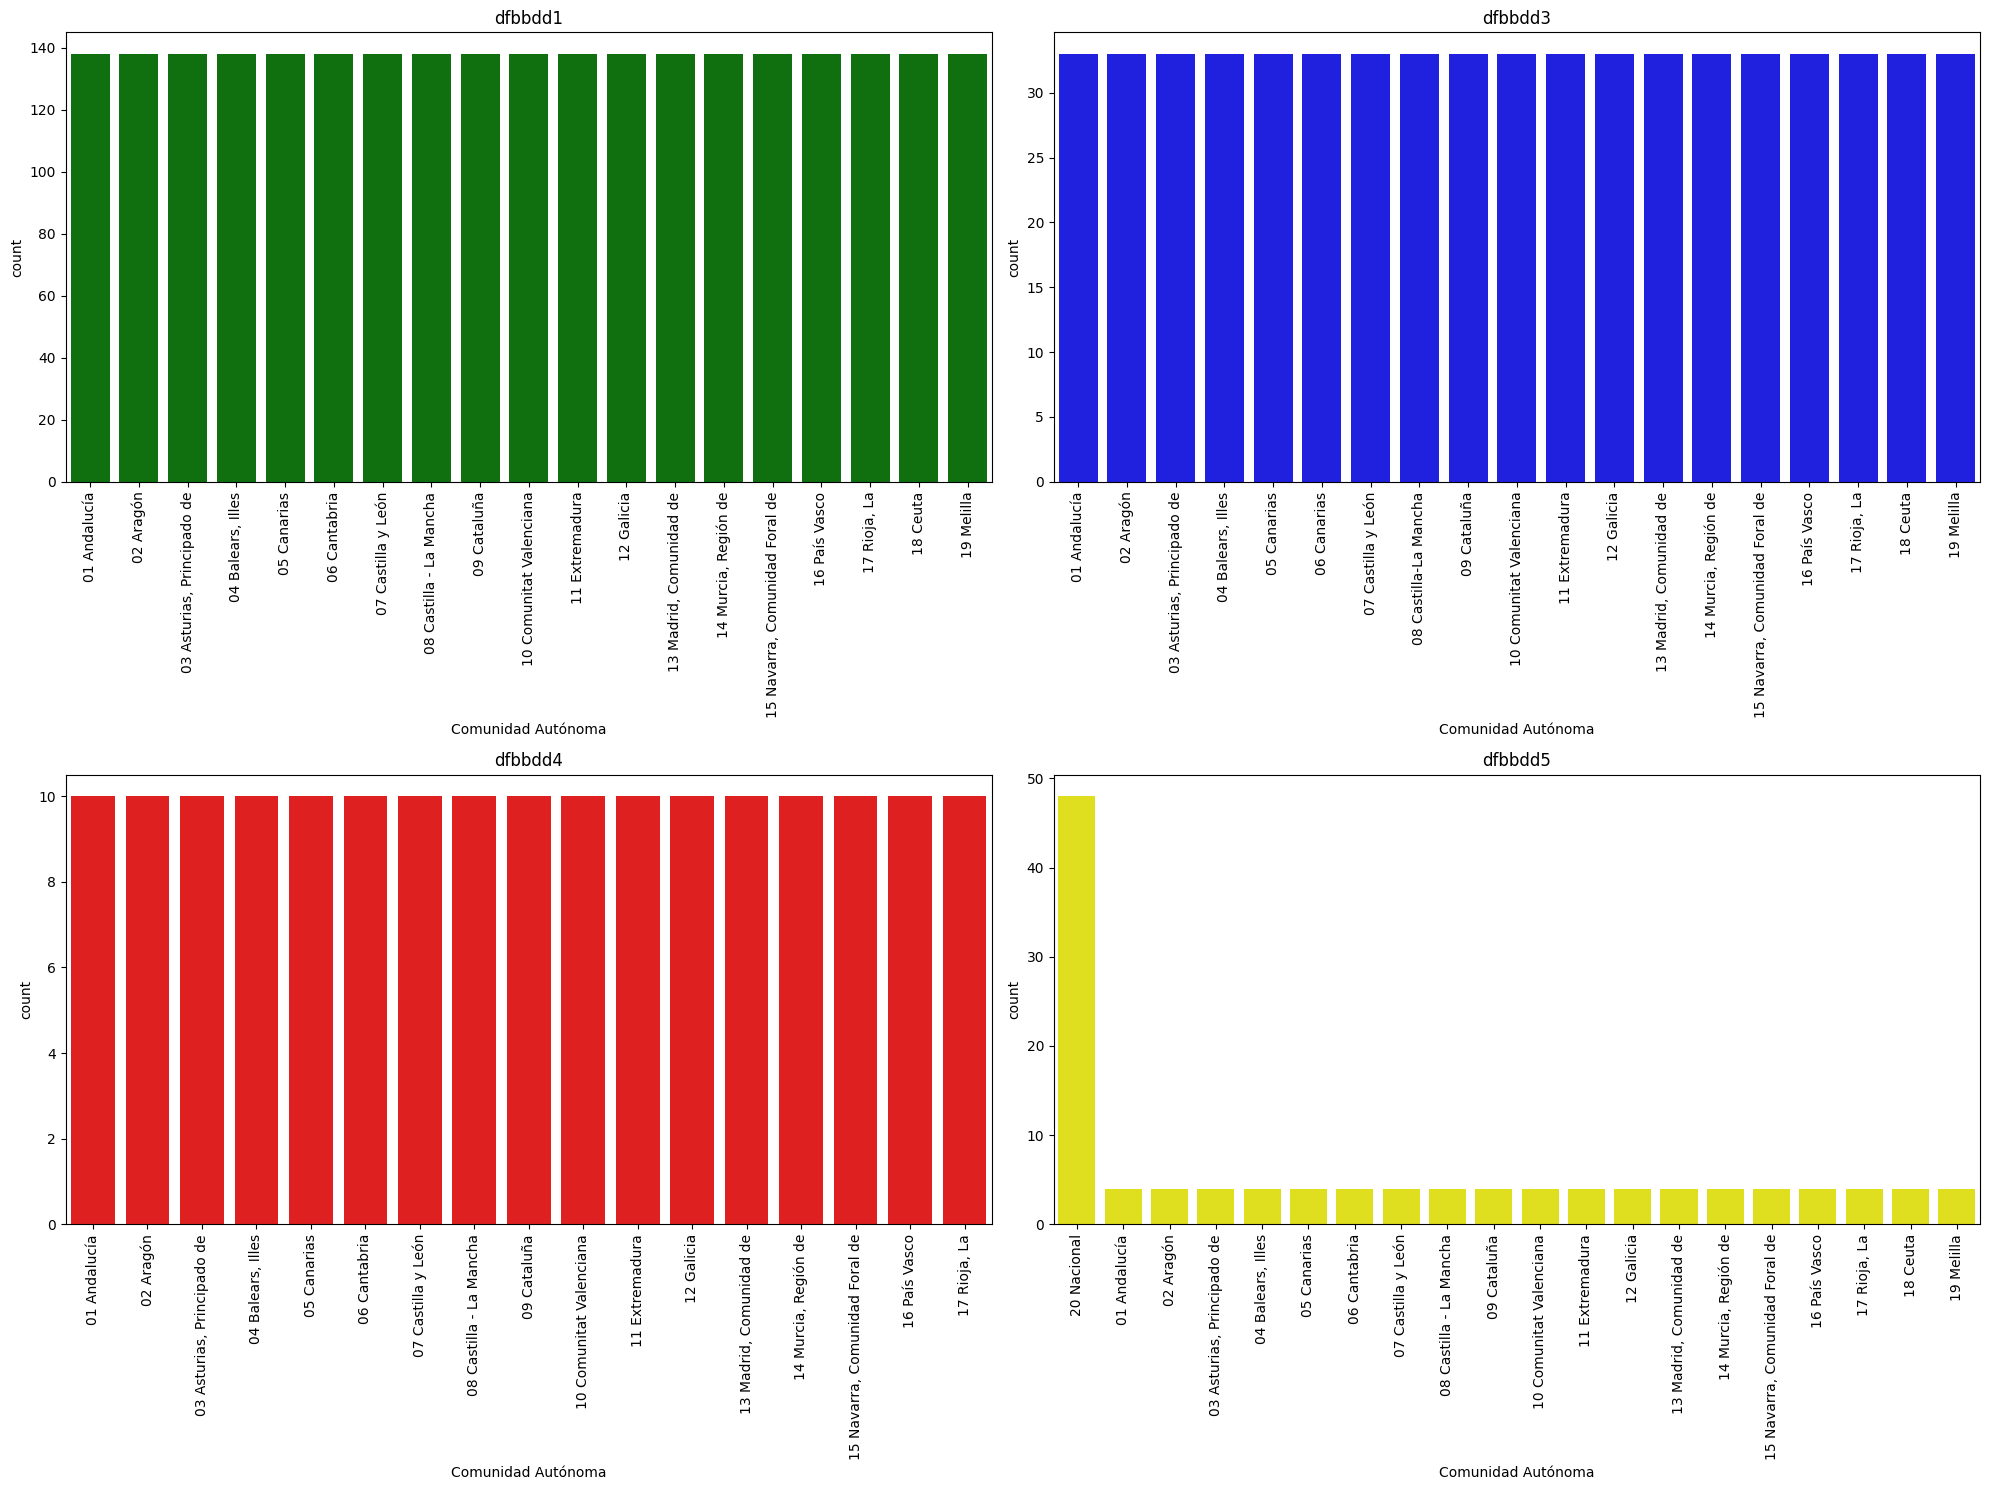

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

#Tamaño de la figura que contendrá todos los subgráficos
plt.figure(figsize=(20, 15))

# Gráfico 1
plt.subplot(2, 2, 1)
sns.countplot(data=dfbbdd1, x='Comunidad Autónoma', color='green')
plt.xticks(rotation=90)
plt.title('dfbbdd1')

# Gráfico 2
plt.subplot(2, 2, 2)
sns.countplot(data=dfbbdd3, x='Comunidad Autónoma', color='blue')
plt.xticks(rotation=90)
plt.title('dfbbdd3')

# Gráfico 3
plt.subplot(2, 2, 3)
sns.countplot(data=dfbbdd4, x='Comunidad Autónoma', color='red')
plt.xticks(rotation=90)
plt.title('dfbbdd4')

# Gráfico 4
plt.subplot(2, 2, 4)
sns.countplot(data=dfbbdd5, x='Comunidad Autónoma', color='yellow')
plt.xticks(rotation=90)
plt.title('dfbbdd5')

#Espaciado entre subgráficos para evitar la superposición
plt.tight_layout()

#Figura con todos los subgráficos
plt.show()


# **GRÁFICOS DESCRIPTIVOS**

##**Diagramas de dispersión**

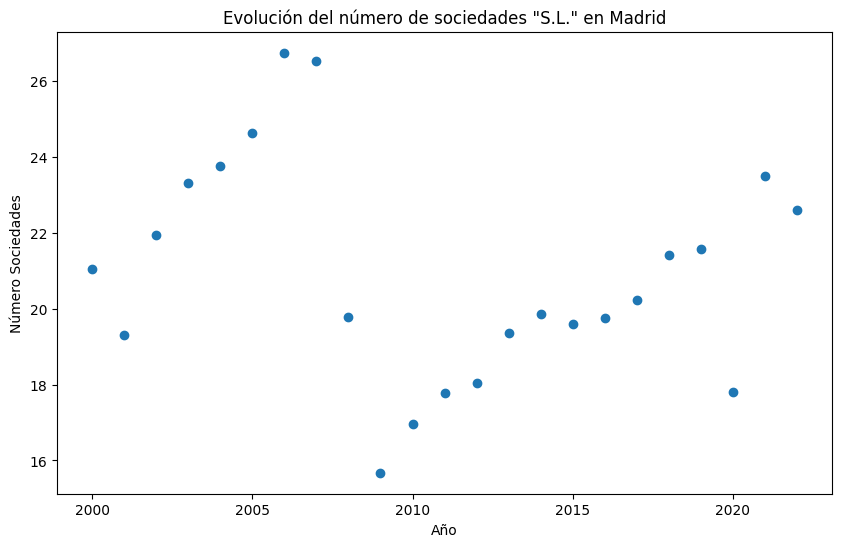

In [59]:
#BASE DE DATOS 1
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrar el DataFrame para quedarse solo con las filas donde "Sociedades o Capital desembolsado" es igual a "Sociedades",
#"Forma jurídica" es igual a "SL" y "Comunidad Autónoma" es igual a "Madrid"
dfbbdd1_filtrado = dfbbdd1.loc[dfbbdd1['Sociedades o Capital desembolsado'] == 'Número de Sociedades']
dfbbdd1_filtrado = dfbbdd1_filtrado.loc[dfbbdd1['Forma jurídica'] == 'S.L.']
dfbbdd1_filtrado = dfbbdd1_filtrado.loc[dfbbdd1['Comunidad Autónoma'] == '13 Madrid, Comunidad de']


dfbbdd1_filtrado['Año'] = pd.to_numeric(dfbbdd1_filtrado['Año'], errors='coerce')

# Relación entre 'Año' y 'Número de Sociedades'
plt.figure(figsize=(10, 6))
plt.scatter(dfbbdd1_filtrado['Año'], dfbbdd1_filtrado['Número Sociedades/Capital'])
plt.title('Evolución del número de sociedades "S.L." en Madrid')
plt.xlabel('Año')
plt.ylabel('Número Sociedades')
plt.show()

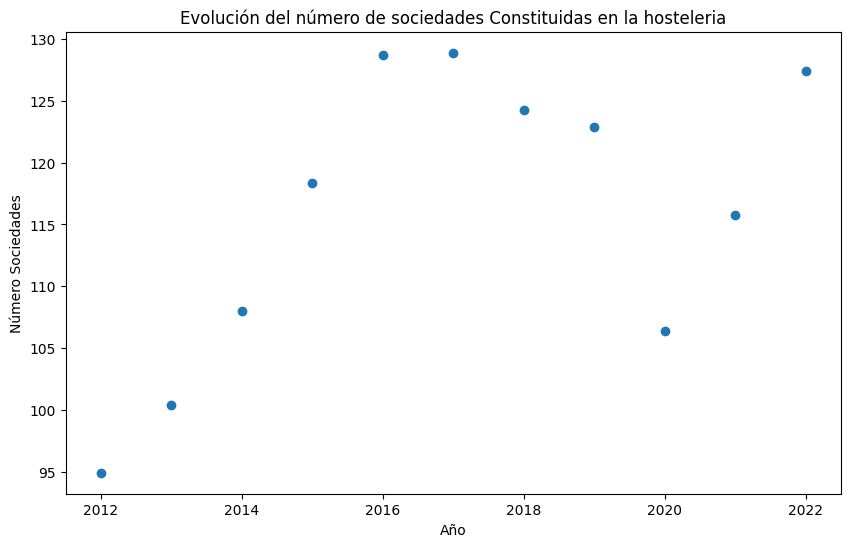

In [60]:
#BASE DE DATOS 2
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrar el DataFrame para quedarse solo con las filas donde "Sociedades o Capital desembolsado" es igual a "Sociedades",
#"Forma jurídica" es igual a "SL" y "Comunidad Autónoma" es igual a "Madrid"
dfbbdd2_filtrado2 = dfbbdd2.loc[dfbbdd2['Actividad económica'] == 'Hostelería']
dfbbdd2_filtrado2 = dfbbdd2_filtrado2.loc[dfbbdd2['Estados Sociedades'] == 'Constituidas']


dfbbdd2_filtrado2['Año'] = pd.to_numeric(dfbbdd2_filtrado2['Año'], errors='coerce')


# Relación entre 'Año' y 'Número de Sociedades'
plt.figure(figsize=(10, 6))
plt.scatter(dfbbdd2_filtrado2['Año'], dfbbdd2_filtrado2['Número Sociedades'])
plt.title('Evolución del número de sociedades Constituidas en la hosteleria')
plt.xlabel('Año')
plt.ylabel('Número Sociedades')
plt.show()

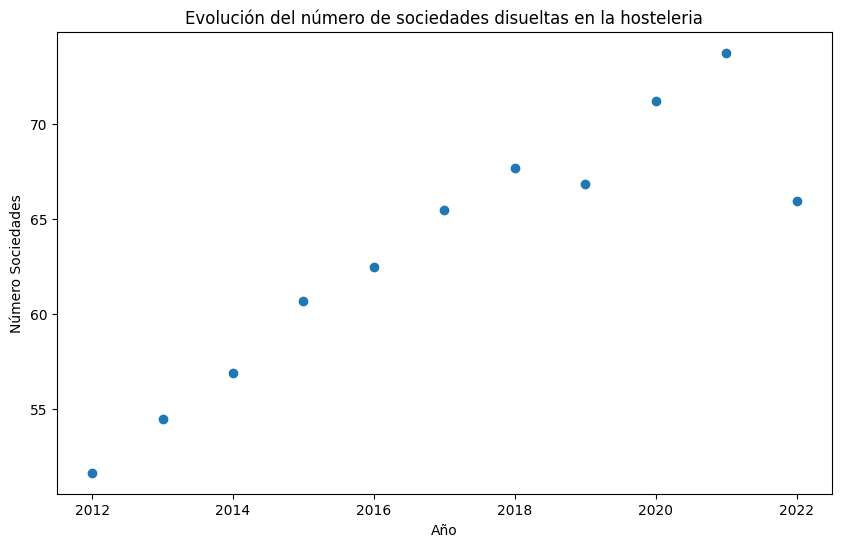

In [61]:
#BASE DE DATOS 2
import matplotlib.pyplot as plt
import seaborn as sns


# Filtrar el DataFrame para quedarse solo con las filas donde "Sociedades o Capital desembolsado" es igual a "Sociedades",
#"Forma jurídica" es igual a "SL" y "Comunidad Autónoma" es igual a "Madrid"
dfbbdd2_filtrado = dfbbdd2.loc[dfbbdd2['Actividad económica'] == 'Hostelería']
dfbbdd2_filtrado = dfbbdd2_filtrado.loc[dfbbdd2['Estados Sociedades'] == 'Disueltas']


dfbbdd2_filtrado['Año'] = pd.to_numeric(dfbbdd2_filtrado['Año'], errors='coerce')


# Relación entre 'Año' y 'Número de Sociedades'
plt.figure(figsize=(10, 6))
plt.scatter(dfbbdd2_filtrado['Año'], dfbbdd2_filtrado['Número Sociedades'])
plt.title('Evolución del número de sociedades disueltas en la hosteleria')
plt.xlabel('Año')
plt.ylabel('Número Sociedades')
plt.show()

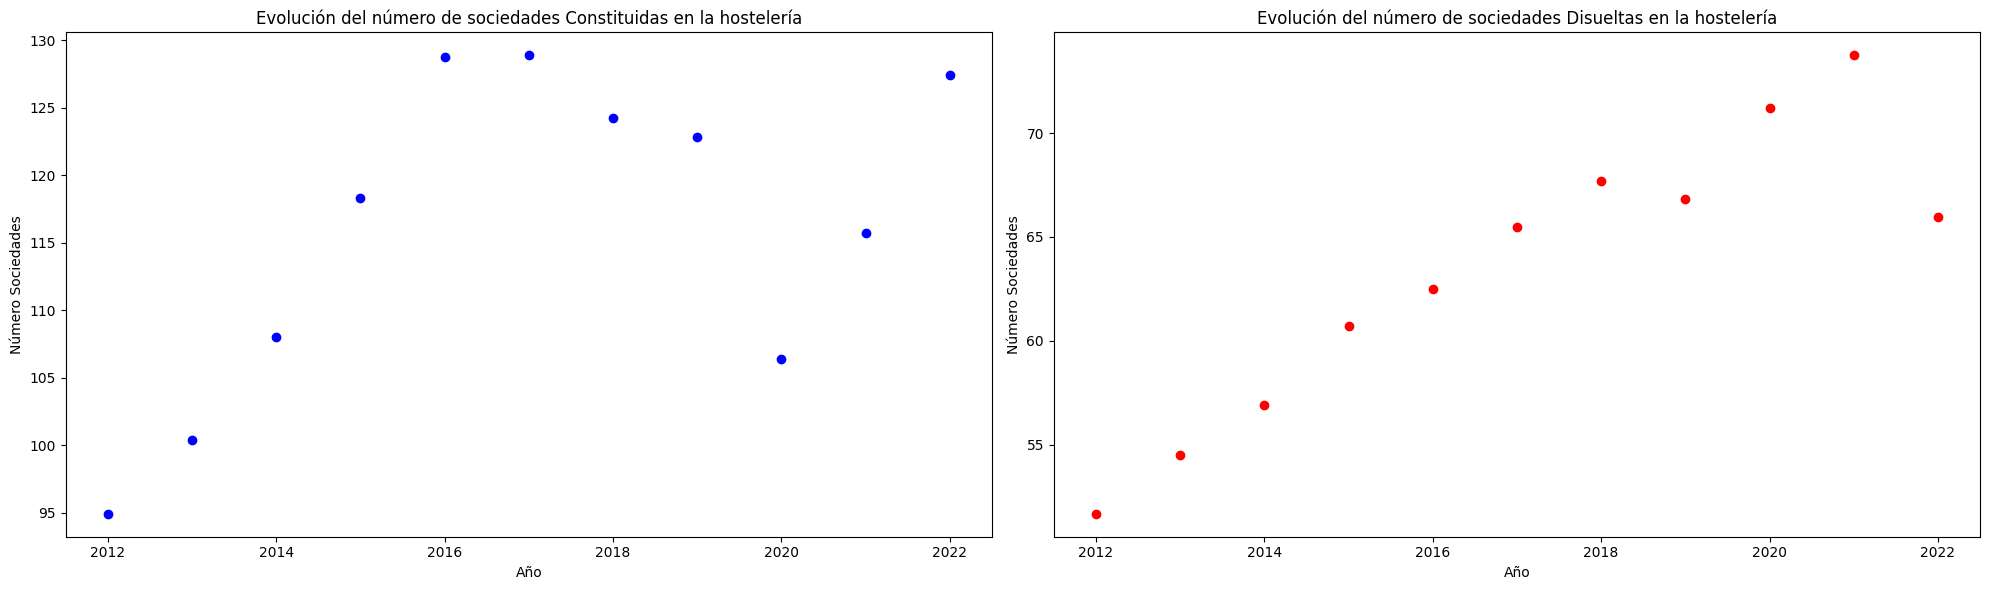

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumiendo que dfbbdd2 ya está definido y filtrado correctamente

# Convertir 'Año' a numérico para ambos DataFrames filtrados
dfbbdd2_filtrado2['Año'] = pd.to_numeric(dfbbdd2_filtrado2['Año'], errors='coerce')
dfbbdd2_filtrado['Año'] = pd.to_numeric(dfbbdd2_filtrado['Año'], errors='coerce')

# Configurar el layout de los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Gráfico 1: Evolución del número de sociedades Constituidas en la hostelería
axes[0].scatter(dfbbdd2_filtrado2['Año'], dfbbdd2_filtrado2['Número Sociedades'], color='blue')
axes[0].set_title('Evolución del número de sociedades Constituidas en la hostelería')
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Número Sociedades')

# Gráfico 2: Evolución del número de sociedades Disueltas en la hostelería
axes[1].scatter(dfbbdd2_filtrado['Año'], dfbbdd2_filtrado['Número Sociedades'], color='red')
axes[1].set_title('Evolución del número de sociedades Disueltas en la hostelería')
axes[1].set_xlabel('Año')
axes[1].set_ylabel('Número Sociedades')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar los gráficos
plt.show()


## **Diagramas de Cajas**

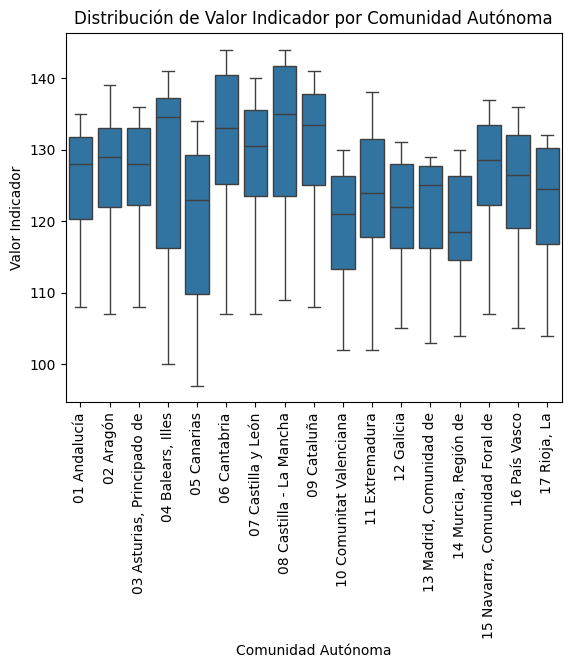

In [63]:
# Ejemplo: Distribución de 'Valor Indicador' por 'Comunidad Autónoma'
sns.boxplot(data=dfbbdd4, x='Comunidad Autónoma', y='Valor Indicador')
plt.xticks(rotation=90)
plt.title('Distribución de Valor Indicador por Comunidad Autónoma')
plt.show()

##**Histogramas**

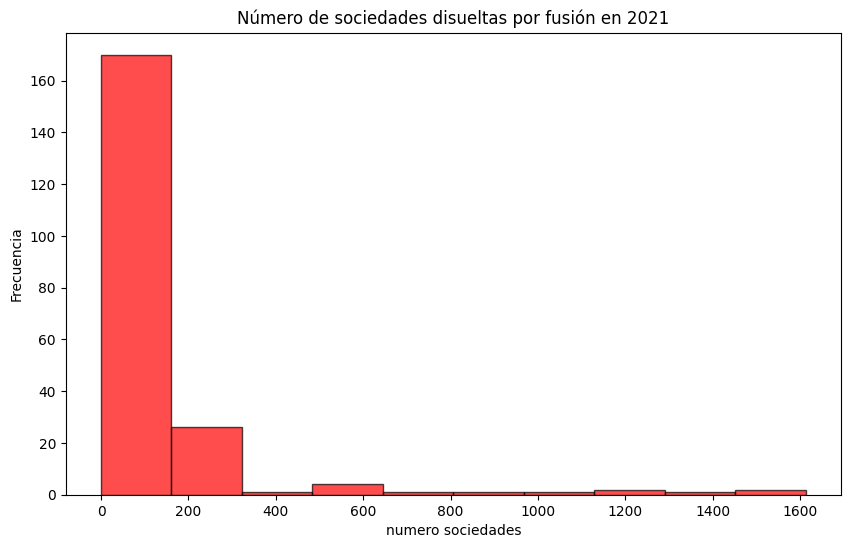

In [64]:
# Filtrar la dfbbdd3 para '2021' y 'Por fusión'
dfbbdd3_filtrado2 = dfbbdd3[dfbbdd3['Año'] == '2021']

dfbbdd3_filtrado2 = dfbbdd3[dfbbdd3['Clase de disolución'] == 'Por fusión']

import matplotlib.pyplot as plt

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(dfbbdd3_filtrado2['Número Sociedades'], alpha=0.7, color='red', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Número de sociedades disueltas por fusión en 2021')
plt.xlabel('numero sociedades')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

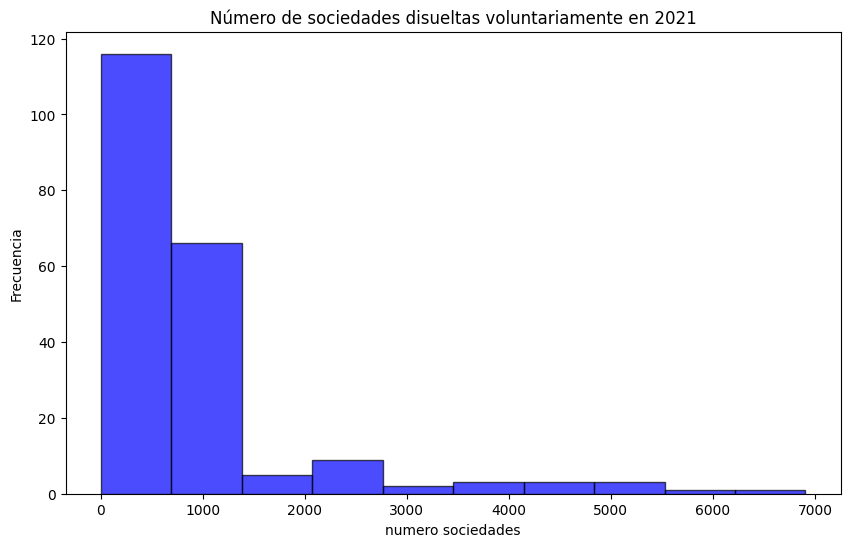

In [65]:
# Filtrar la dfbbdd3 para '2021' y 'Voluntarias'
dfbbdd3_filtrado = dfbbdd3[dfbbdd3['Año'] == '2021']

dfbbdd3_filtrado = dfbbdd3[dfbbdd3['Clase de disolución'] == 'Voluntaria']

import matplotlib.pyplot as plt

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(dfbbdd3_filtrado['Número Sociedades'], alpha=0.7, color='blue', edgecolor='black')

# Añadir títulos y etiquetas
plt.title('Número de sociedades disueltas voluntariamente en 2021')
plt.xlabel('numero sociedades')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

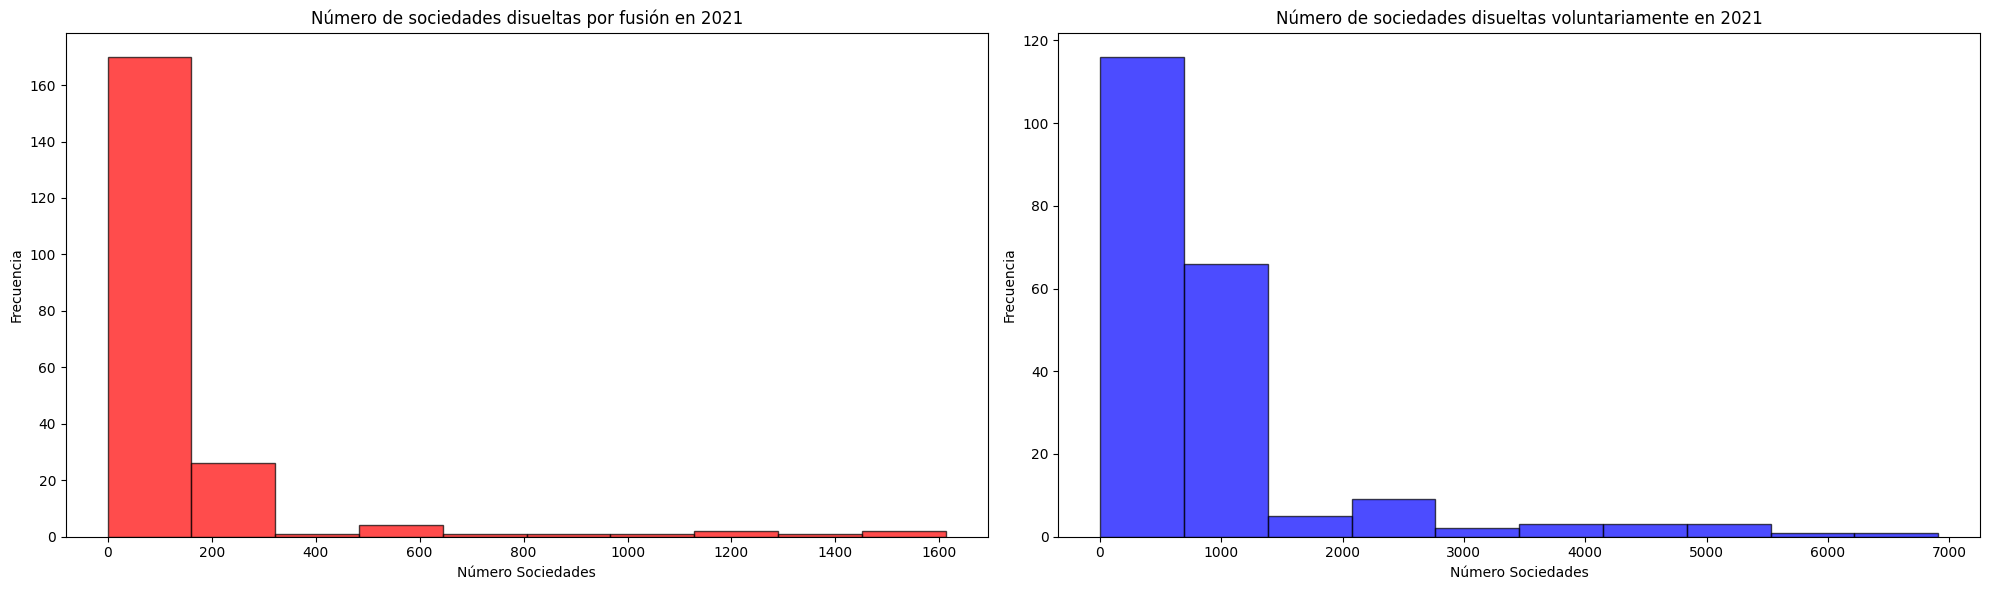

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configurar el layout de los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Primer Histograma: Número de sociedades disueltas por fusión en 2021
axes[0].hist(dfbbdd3_filtrado2['Número Sociedades'], alpha=0.7, color='red', edgecolor='black')
axes[0].set_title('Número de sociedades disueltas por fusión en 2021')
axes[0].set_xlabel('Número Sociedades')
axes[0].set_ylabel('Frecuencia')

# Segundo Histograma: Número de sociedades disueltas voluntariamente en 2021
axes[1].hist(dfbbdd3_filtrado['Número Sociedades'], alpha=0.7, color='blue', edgecolor='black')
axes[1].set_title('Número de sociedades disueltas voluntariamente en 2021')
axes[1].set_xlabel('Número Sociedades')
axes[1].set_ylabel('Frecuencia')

# Ajustar el layout para evitar superposiciones
plt.tight_layout()

# Mostrar los histogramas
plt.show()